In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams

from imblearn.over_sampling import SMOTE #Synthetic Minority Over-sampling Technique
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, fbeta_score, PrecisionRecallDisplay

# Read the Data:

In [2]:
df=pd.read_csv('train_dataset_final1.csv')
df

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,0,0,60323.86,60728.22,56472.74,28602.01,22191.53,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,-1,0,11157.67,0.00,0.88,0.65,2700.96,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,0,0,47930.96,48921.91,50034.26,50748.90,51902.56,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,0,0,91152.44,92916.01,90652.30,85295.56,80416.75,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,-2,-2,19666.40,999.04,3186.48,44932.48,2099.77,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,30259,1,1,2,90000,33.0,0,0,0,0,2,2,75452.79,76395.38,79167.72,84903.65,87915.80,90042.87,2800.18,3999.97,8000.09,5347.85,3699.98,3128.06,82312.50,0.05,0
25243,30260,1,0,2,60000,49.0,0,0,0,0,0,0,59578.90,66780.96,65507.11,17677.07,19481.11,19204.07,22000.17,2187.56,2501.13,2512.09,4004.89,2604.22,41371.67,0.14,1
25244,30261,2,0,1,120000,31.0,-1,-1,-1,-1,-1,-1,1315.64,1315.42,1315.52,533.03,4115.37,9834.64,1315.83,1315.60,533.08,4116.08,9834.10,7100.12,3071.83,1.31,1
25245,30262,1,1,4,390000,40.0,0,0,0,0,0,0,195687.97,199033.02,197960.89,195958.31,196017.91,199013.32,7636.03,5652.86,5544.67,5532.37,5859.09,6818.14,197278.83,0.03,0


# Data Pre-Processing and Data Visualization:

1) Data Pre-processing:


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,25247.0,17640.000000,7288.325459,5017.00,11328.500,17640.00,23951.500,30263.00
marriage,25247.0,1.551907,0.522629,0.00,1.000,2.00,2.000,3.00
sex,25247.0,0.604111,0.489050,0.00,0.000,1.00,1.000,1.00
education,25247.0,1.852101,0.797379,0.00,1.000,2.00,2.000,6.00
LIMIT_BAL,25247.0,168342.060443,129892.784807,10000.00,50000.000,140000.00,240000.000,1000000.00
age,25121.0,35.438199,9.174998,21.00,28.000,34.00,41.000,79.00
pay_0,25247.0,-0.042857,1.099315,-2.00,-1.000,0.00,0.000,8.00
pay_2,25247.0,-0.159544,1.173990,-2.00,-1.000,0.00,0.000,8.00
pay_3,25247.0,-0.190359,1.172636,-2.00,-1.000,0.00,0.000,8.00
pay_4,25247.0,-0.241415,1.146753,-2.00,-1.000,0.00,0.000,7.00


Handling Missing Data

In [5]:
df.isna().sum()


,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,126
pay_0,0
pay_2,0
pay_3,0
pay_4,0


In [6]:
df['age'].mean()

np.float64(35.43819911627722)

In [7]:
df['age'] = df['age'].fillna(df['age'].mean())

In [8]:
df.isna().sum().sort_values(ascending=False)


,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0
pay_0,0
pay_2,0
pay_3,0
pay_4,0


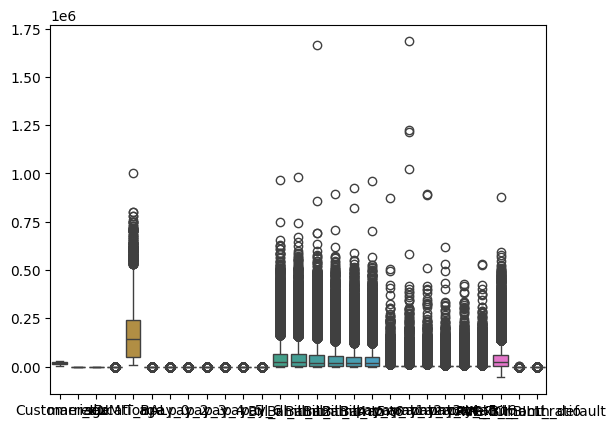

In [9]:
sns.boxplot(df)
rcParams['figure.figsize'] = 20, 20

In [10]:
df.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default'],
      dtype='object')

In [11]:
ca=['sex', 'education', 'marriage', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6']
for i in ca:
    print (i,df[i].unique())

sex [0 1]
education [2 1 3 4 5 6 0]
marriage [2 1 3 0]
pay_0 [ 2  0 -2 -1  1  8  4  3  5  6  7]
pay_2 [ 2  0 -2 -1  7  4  3  1  5  6  8]
pay_3 [ 2 -2  0 -1  6  3  4  1  7  5  8]
pay_4 [ 0 -2 -1  2  5  3  4  7  6  1]
pay_5 [ 0 -1 -2  2  4  3  6  7  5]
pay_6 [ 0 -2 -1  2  3  4  5  7  6  8]


In [12]:
df['education'].replace({0:4,5:4,6:4}, inplace=True)
df.education.value_counts()

,count
education,
2,11717
1,8988
3,4115
4,427


In [13]:
df['marriage'].replace({0:3}, inplace=True)
df.marriage.value_counts()

,count
marriage,
2,13441
1,11480
3,326


2) Data Visualization:



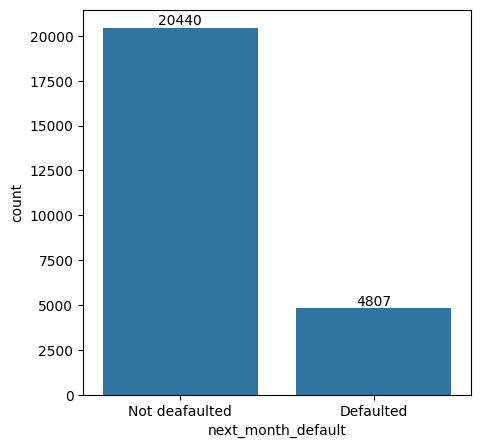

In [14]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x= df['next_month_default'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["Not deafaulted", "Defaulted"])
plt.show()

SEX Variable:

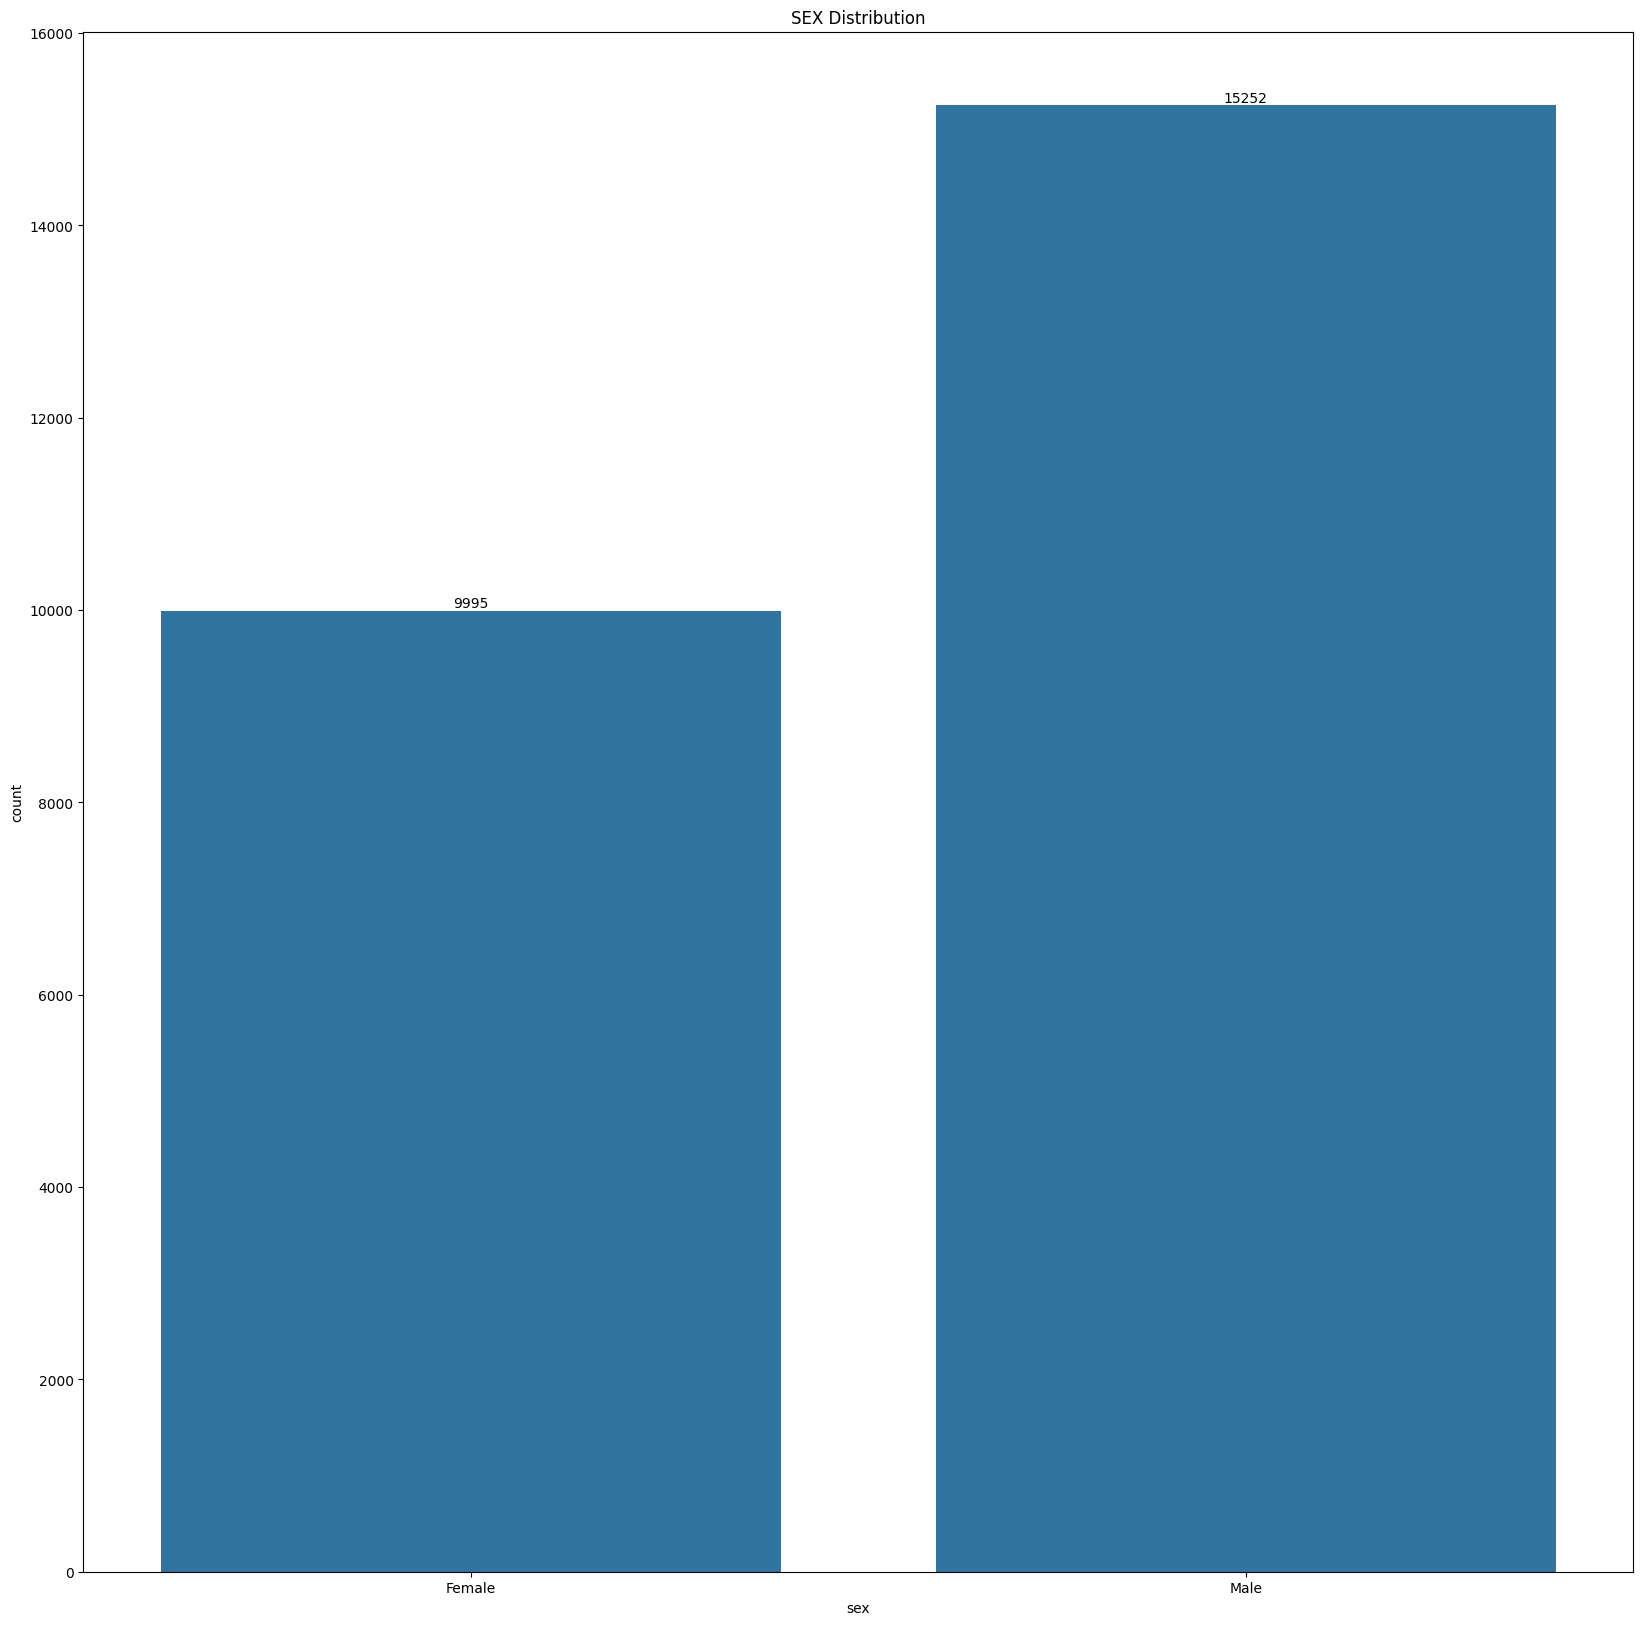

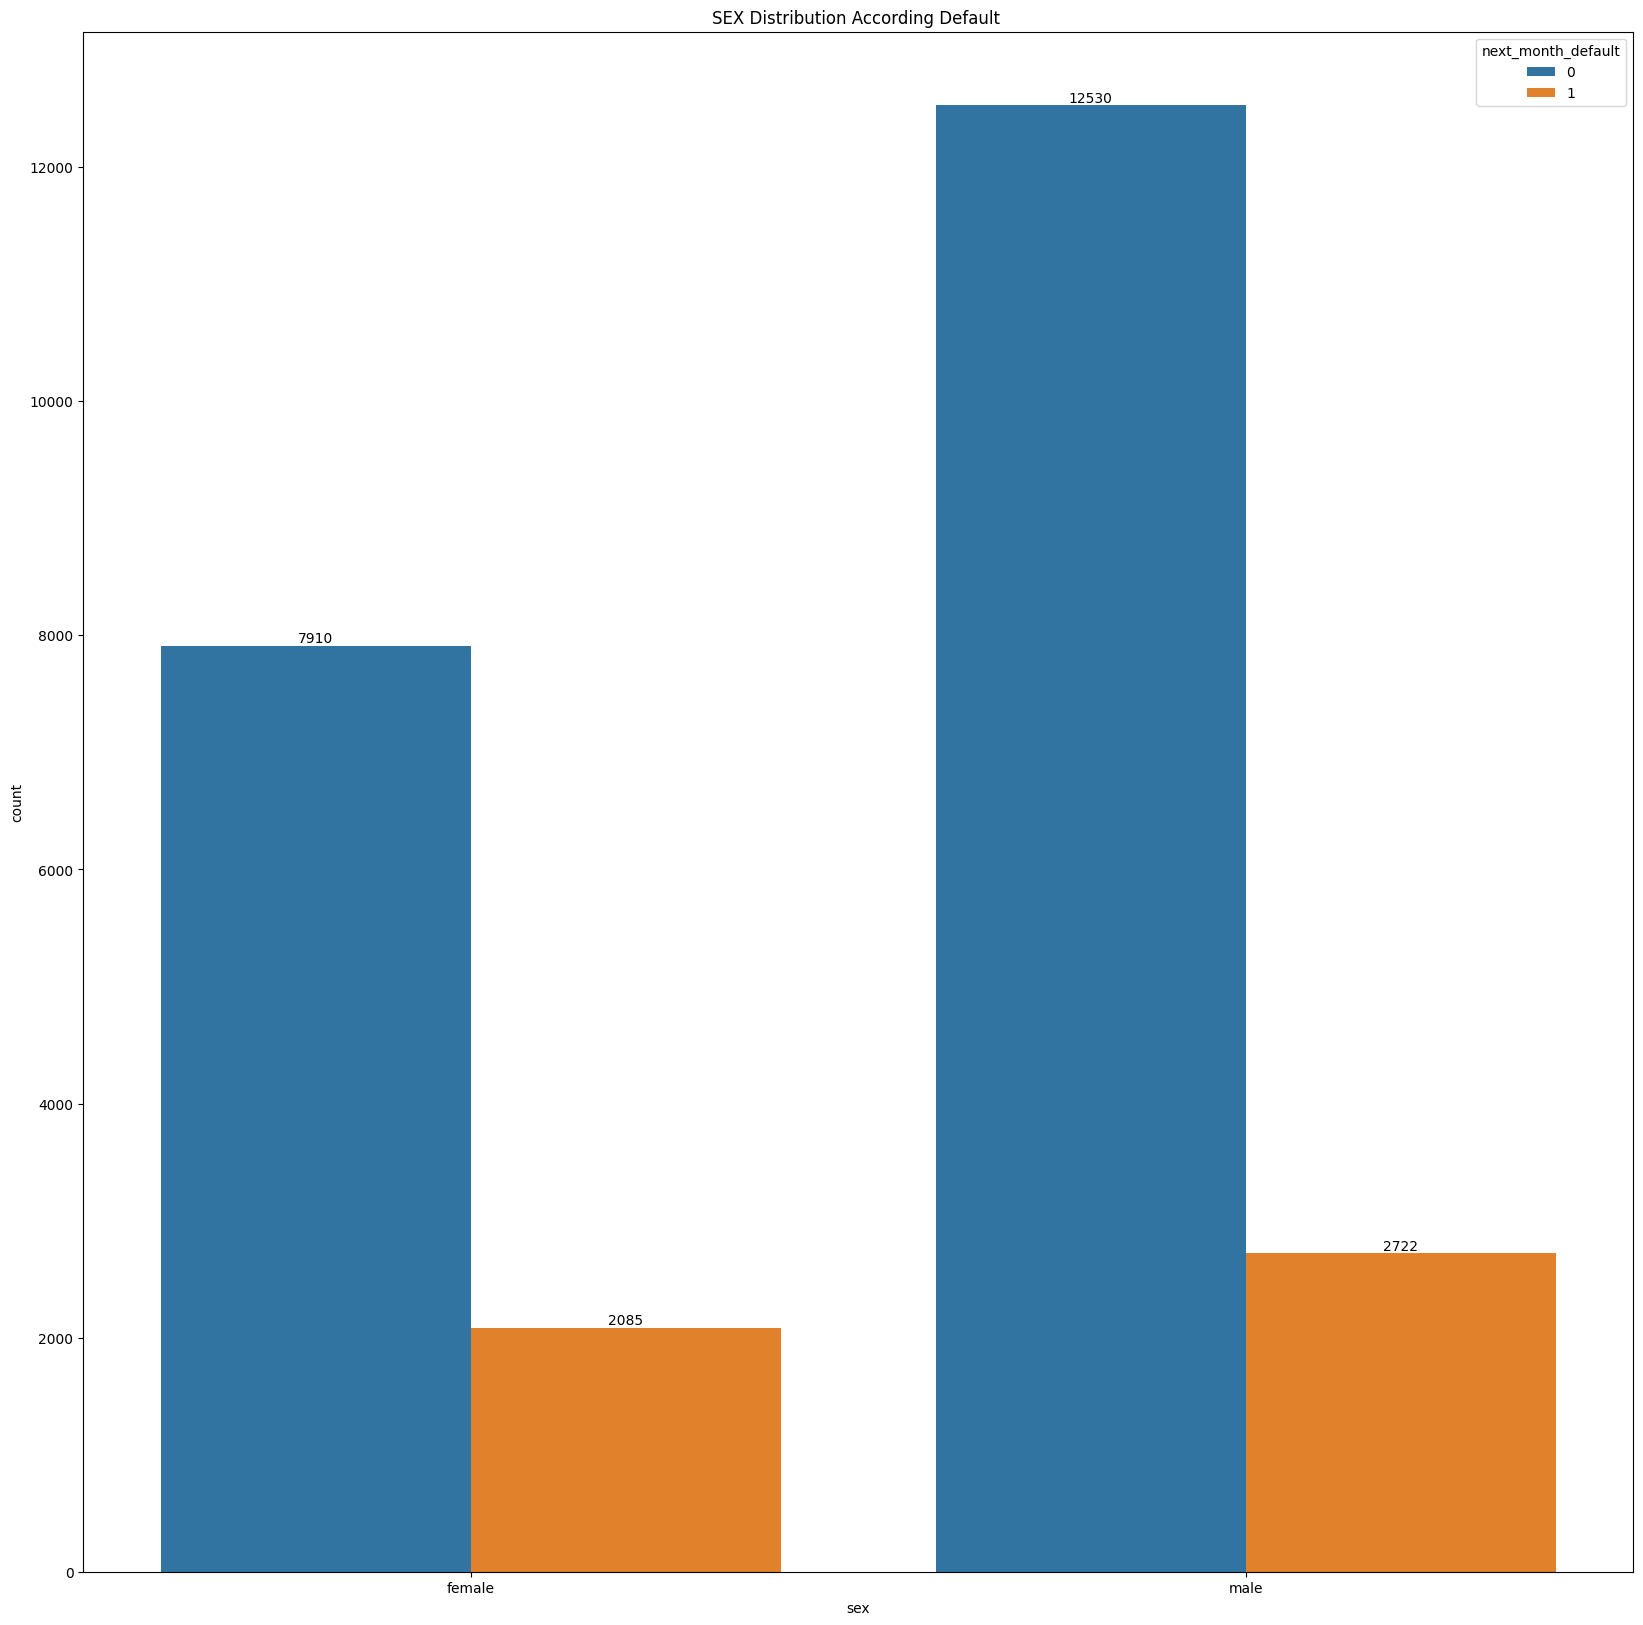

In [15]:
ax=sns.countplot(x= df['sex'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([1,0], labels=["Male", "Female"])
plt.title("SEX Distribution")
plt.show()

ax=sns.countplot(data=df, x="sex", hue="next_month_default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([1,0], labels=["male", "female"])
plt.title("SEX Distribution According Default ")
plt.show()

Education Variable:

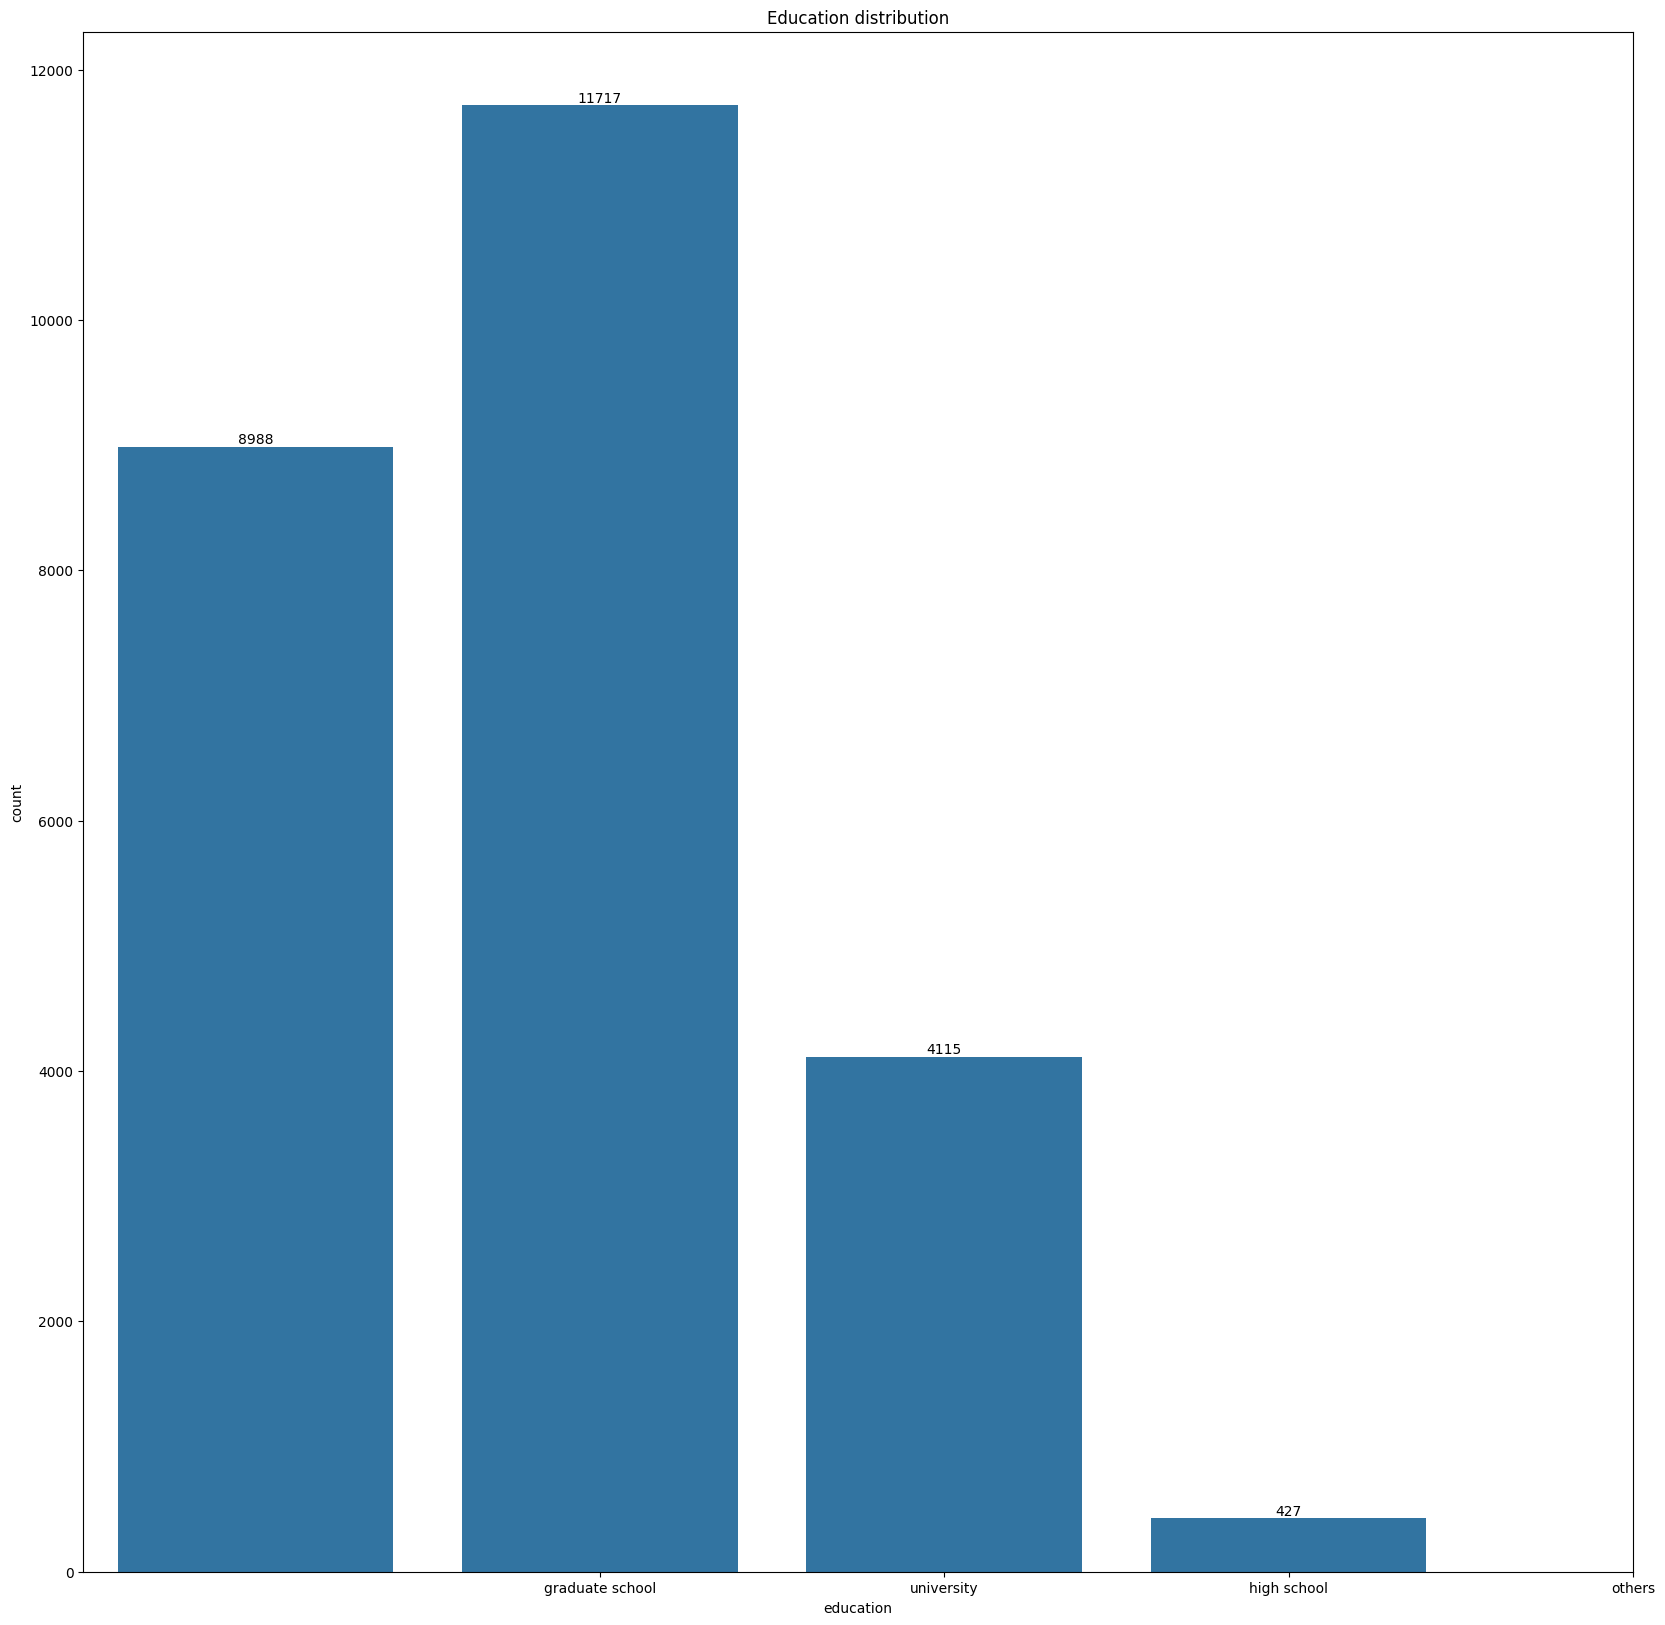

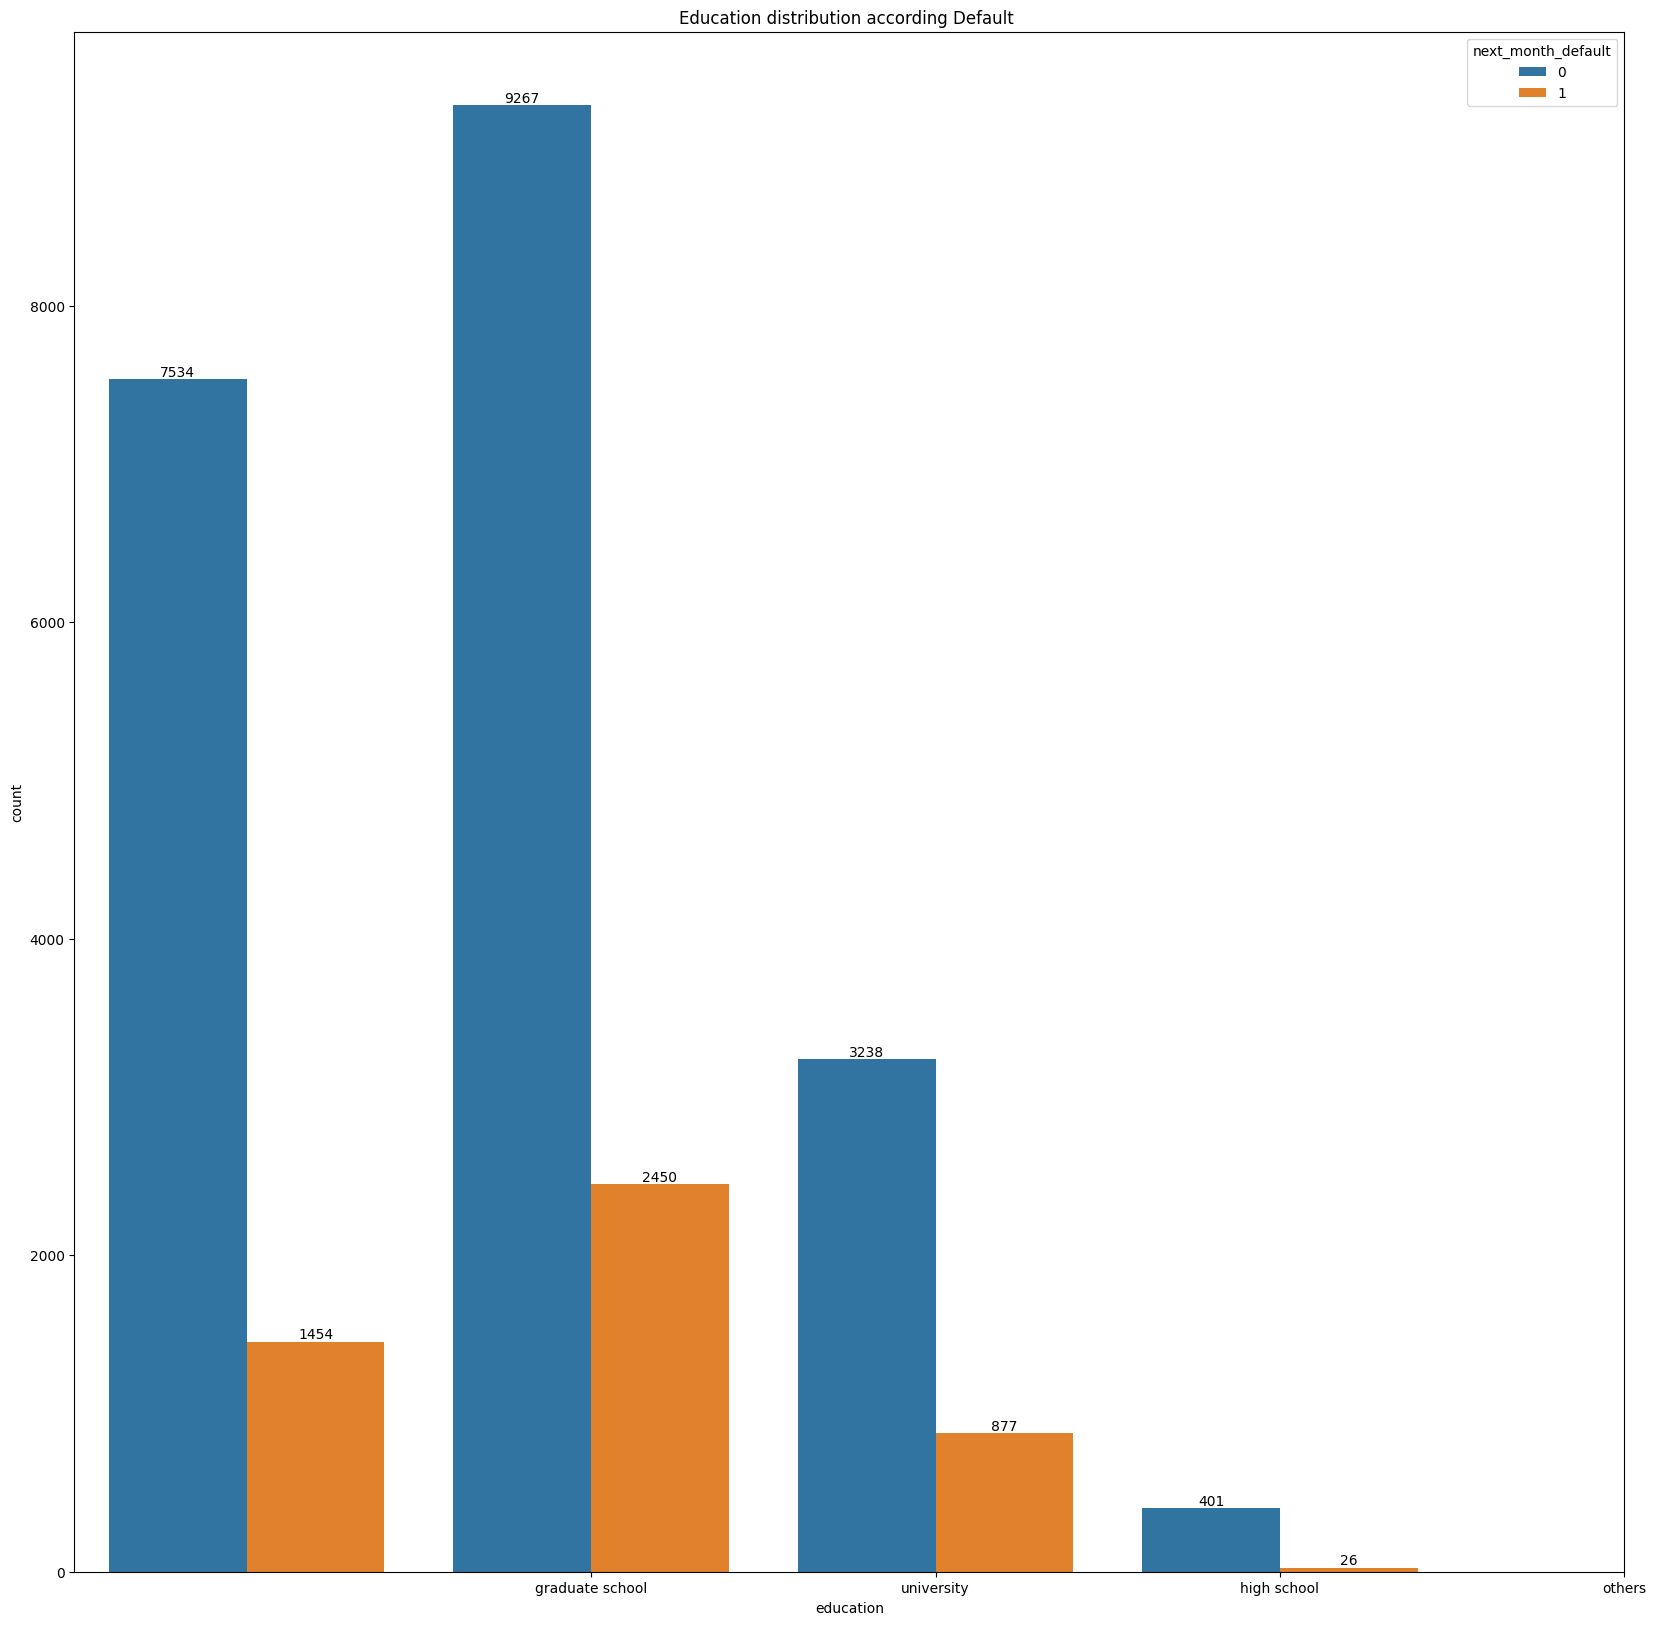

In [16]:
ax=sns.countplot(x= df['education'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([1,2,3,4], labels=["graduate school", "university",'high school','others'])
plt.title("Education distribution")
plt.show()

ax=sns.countplot(data=df, x="education", hue="next_month_default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([1,2,3,4], labels=["graduate school", "university",'high school','others'])
plt.title("Education distribution according Default ")
plt.show()

Marriage Status Variable:

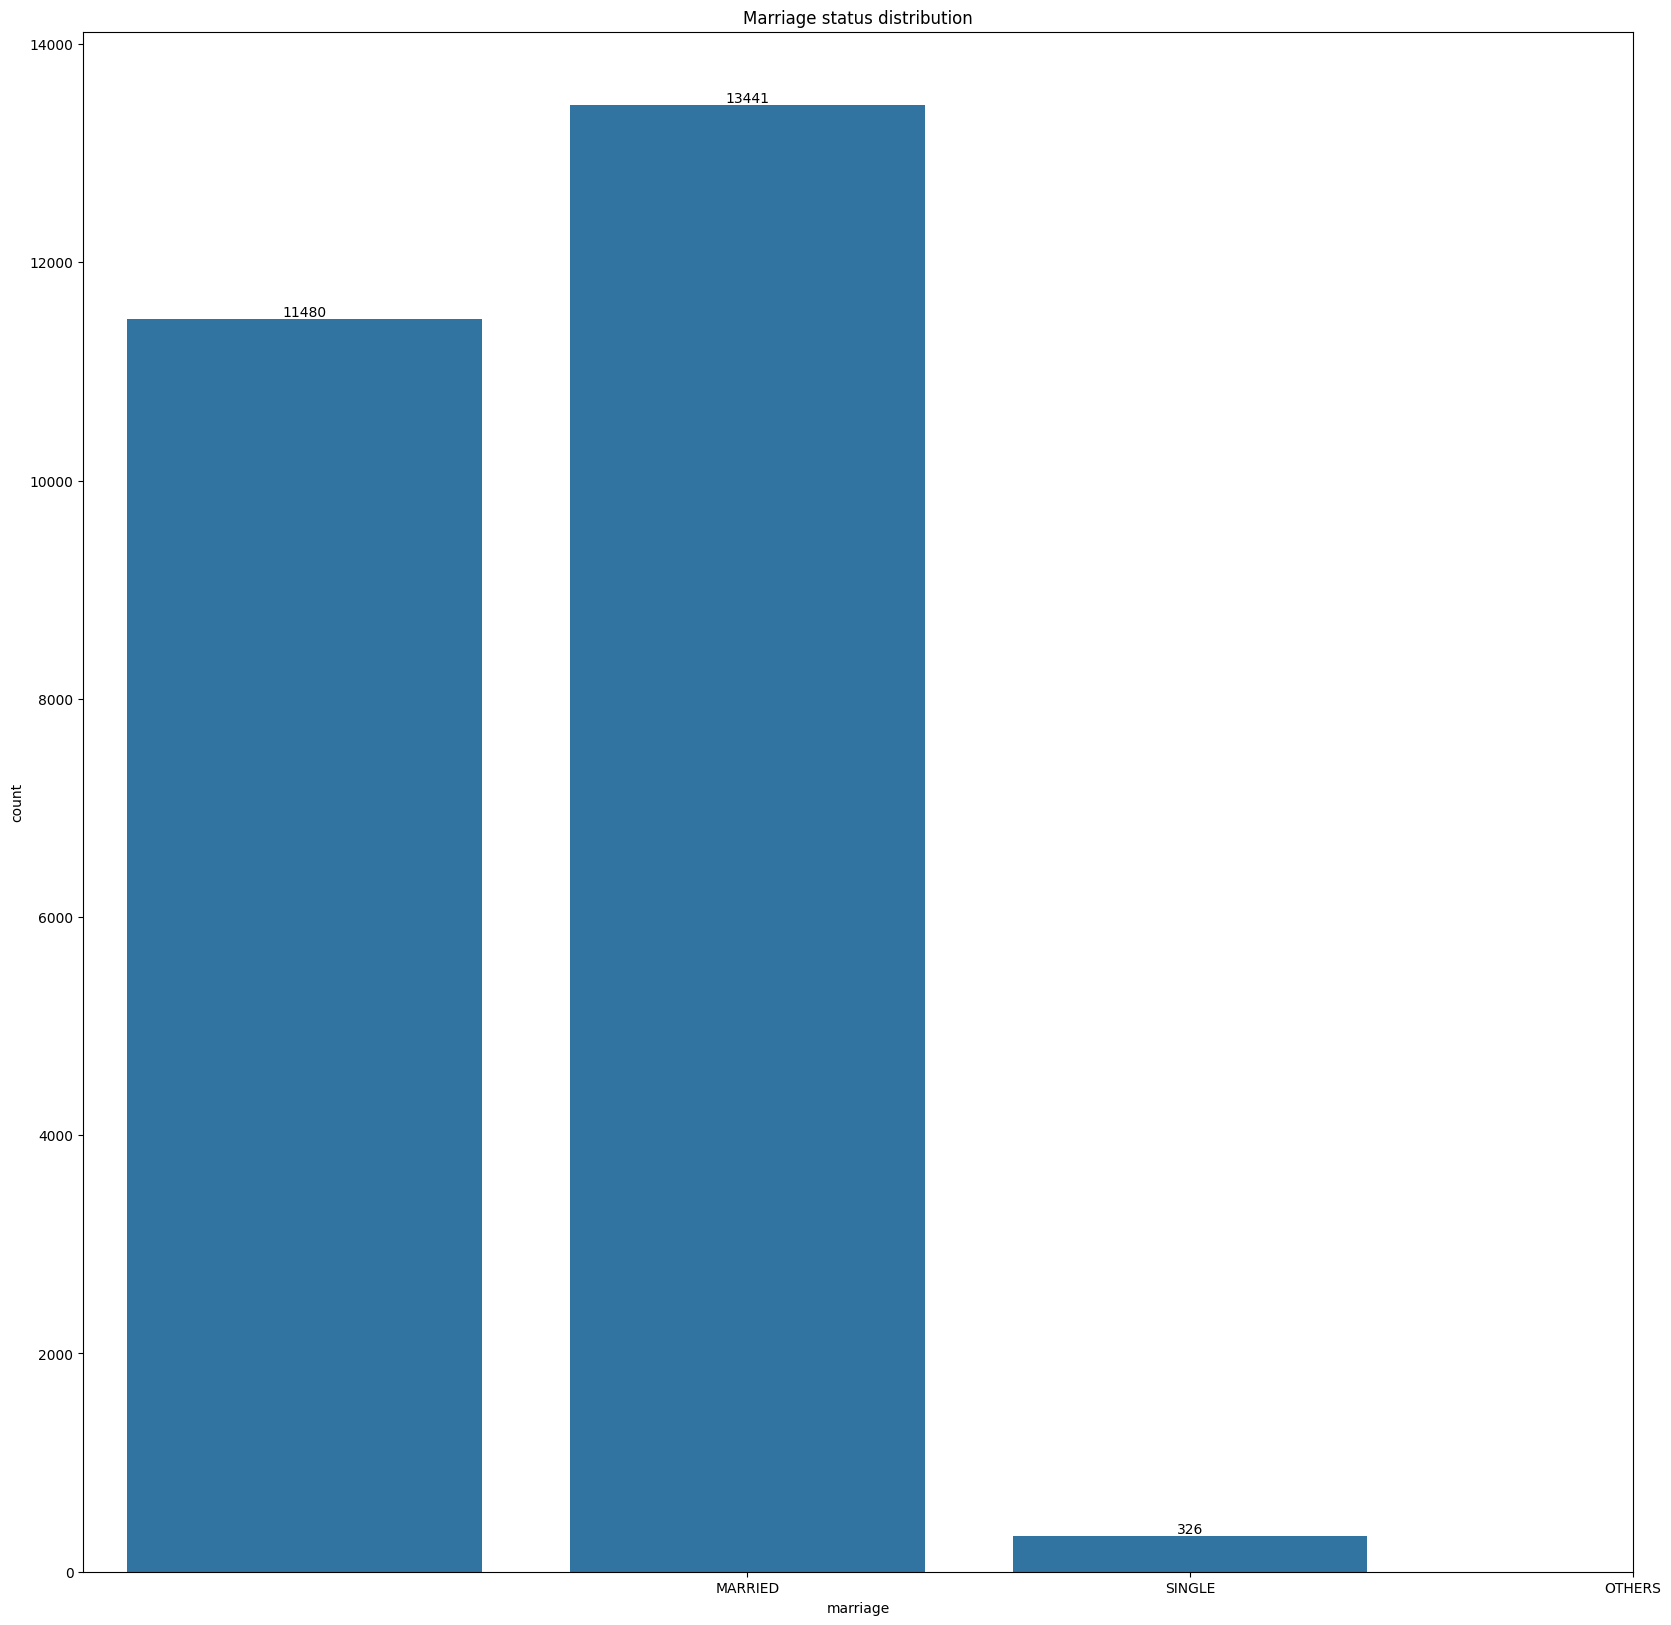

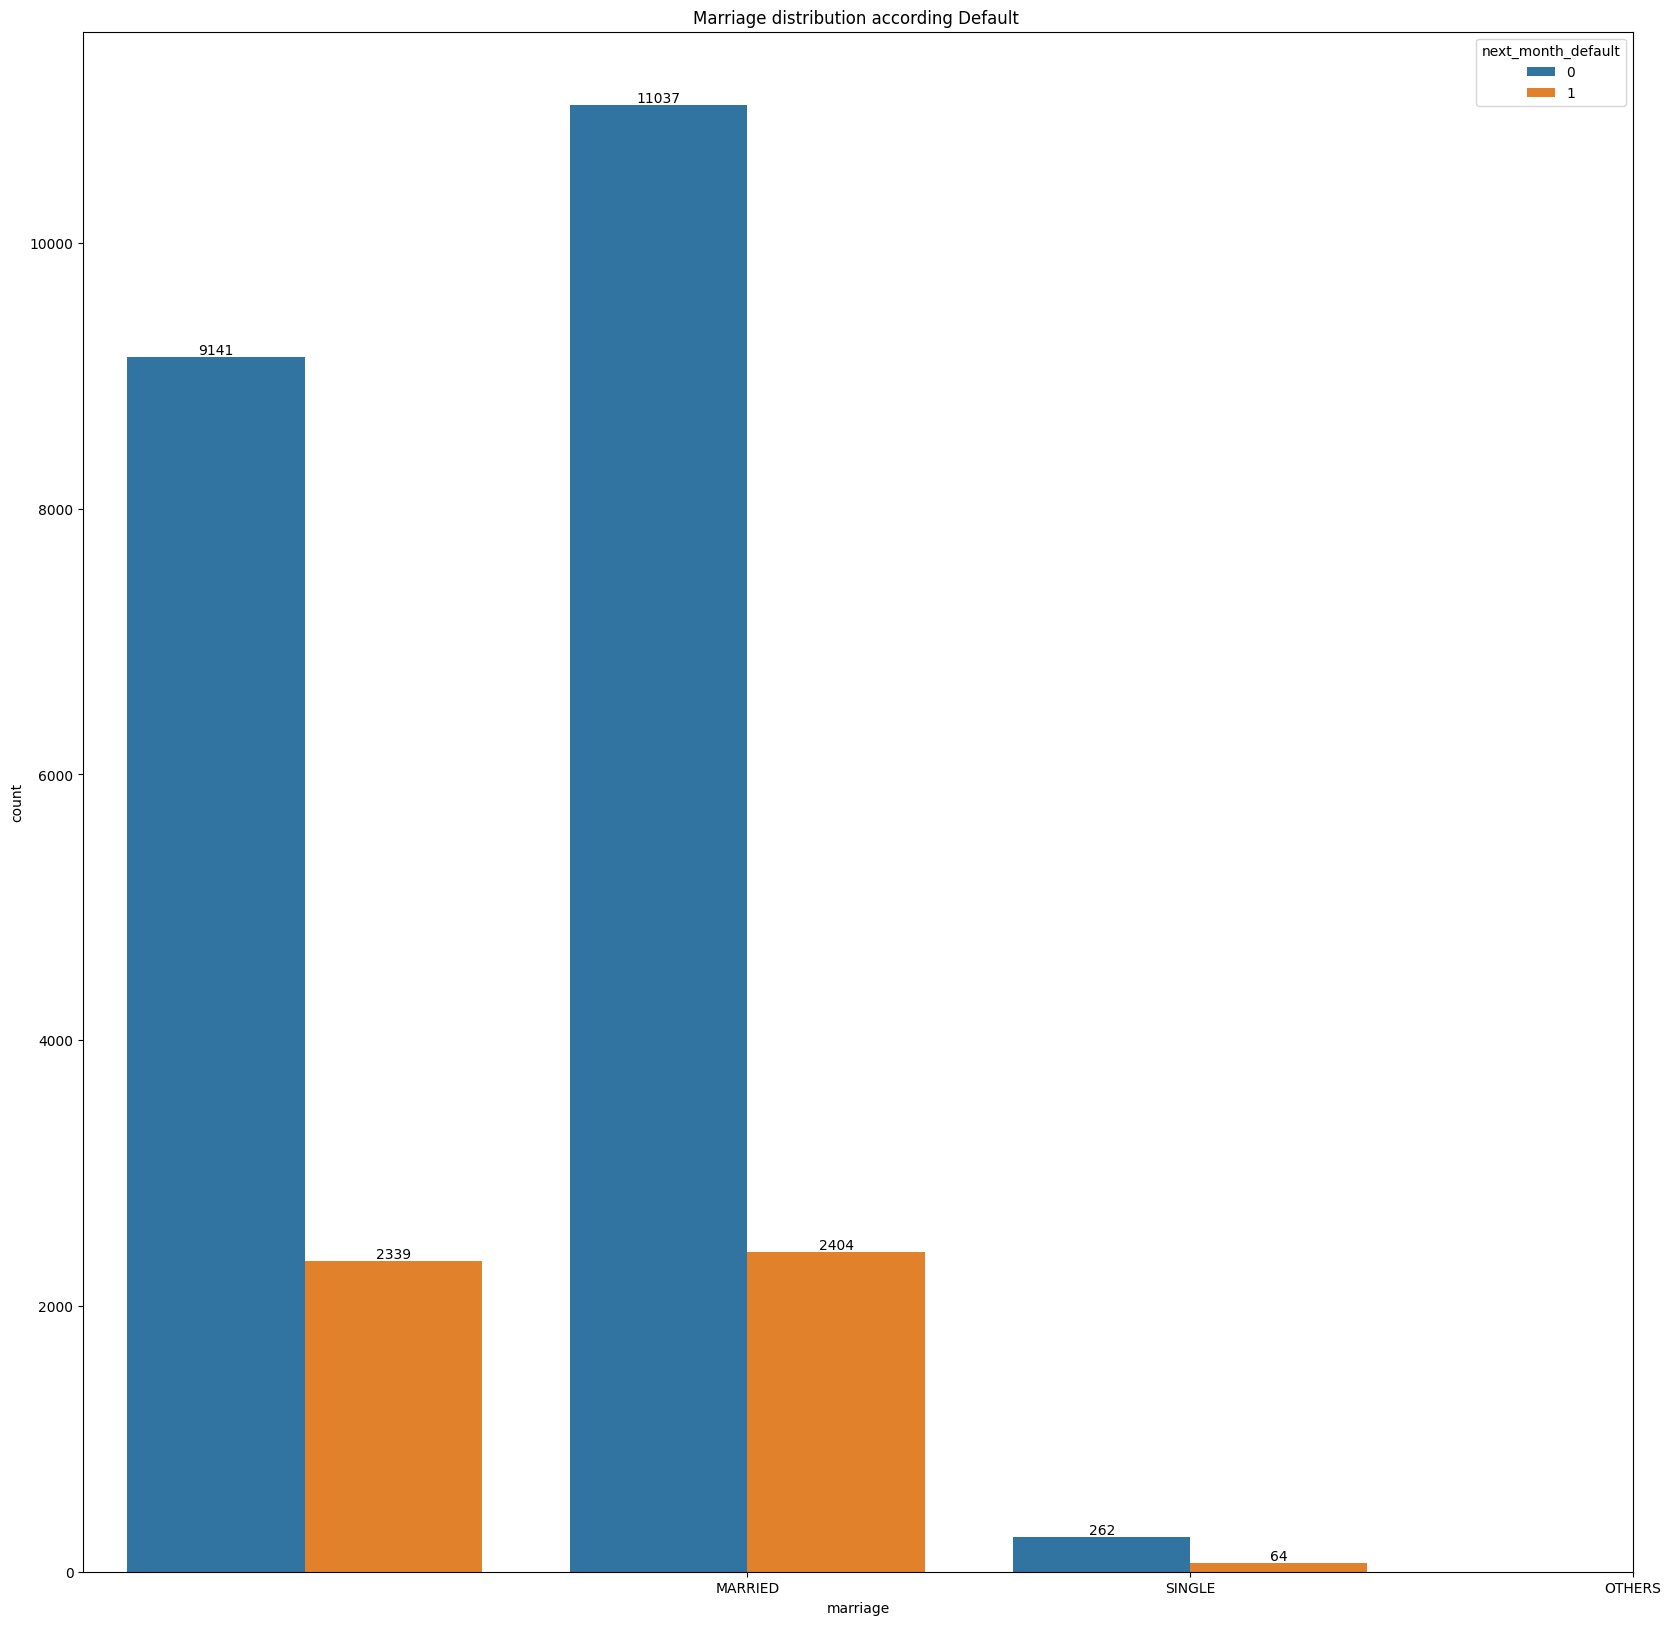

In [17]:
ax=sns.countplot(x= df['marriage'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([1,2,3], labels=["MARRIED", "SINGLE",'OTHERS'])
plt.title("Marriage status distribution")
plt.show()

ax=sns.countplot(data=df, x="marriage", hue="next_month_default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([1,2,3], labels=["MARRIED", "SINGLE",'OTHERS'])
plt.title("Marriage distribution according Default ")
plt.show()

Age Variable:

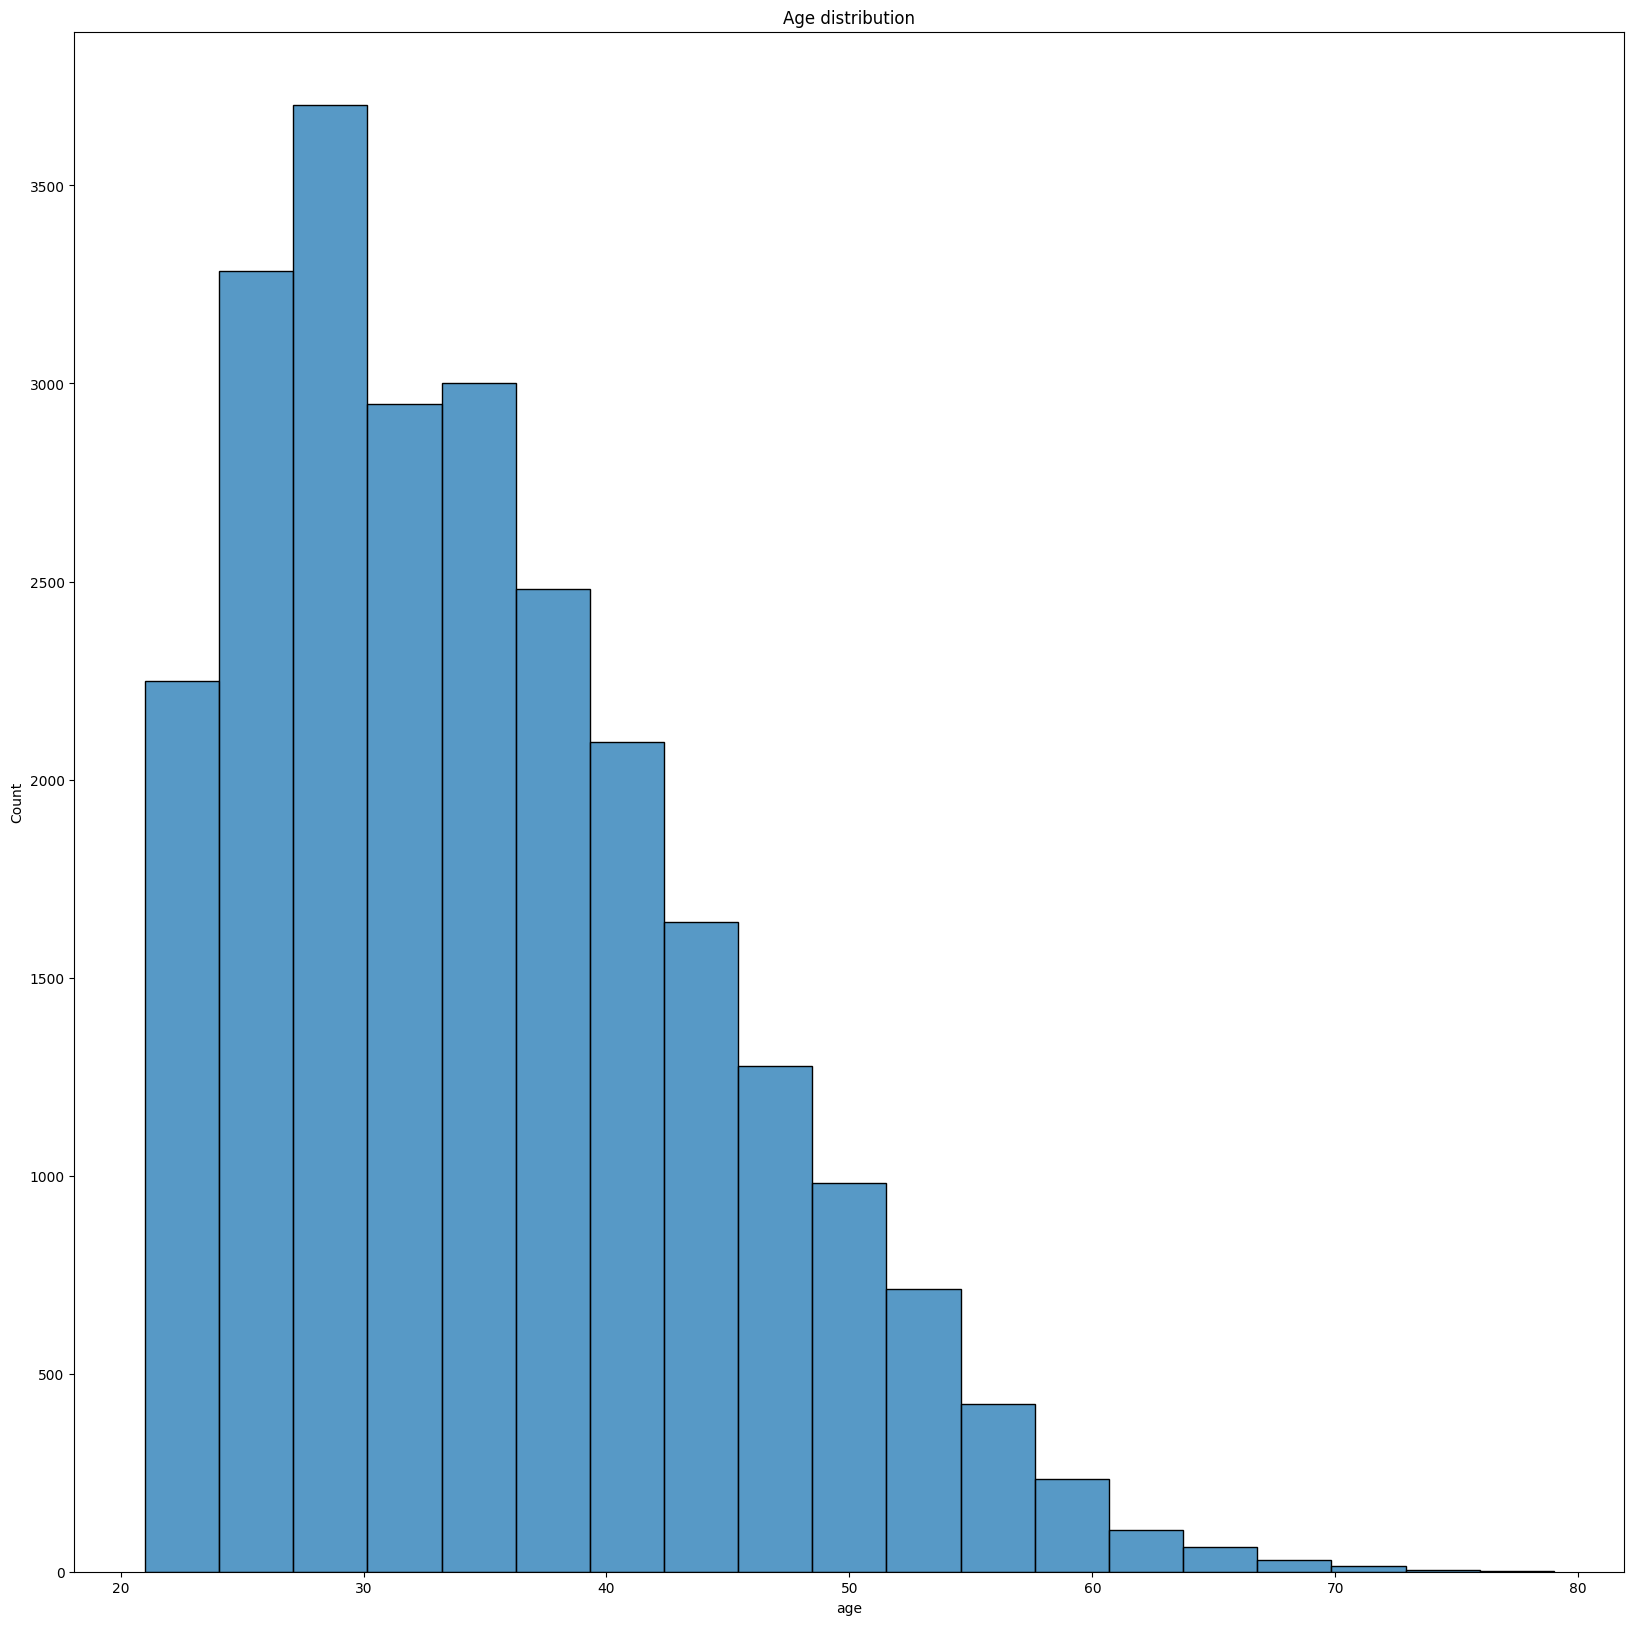

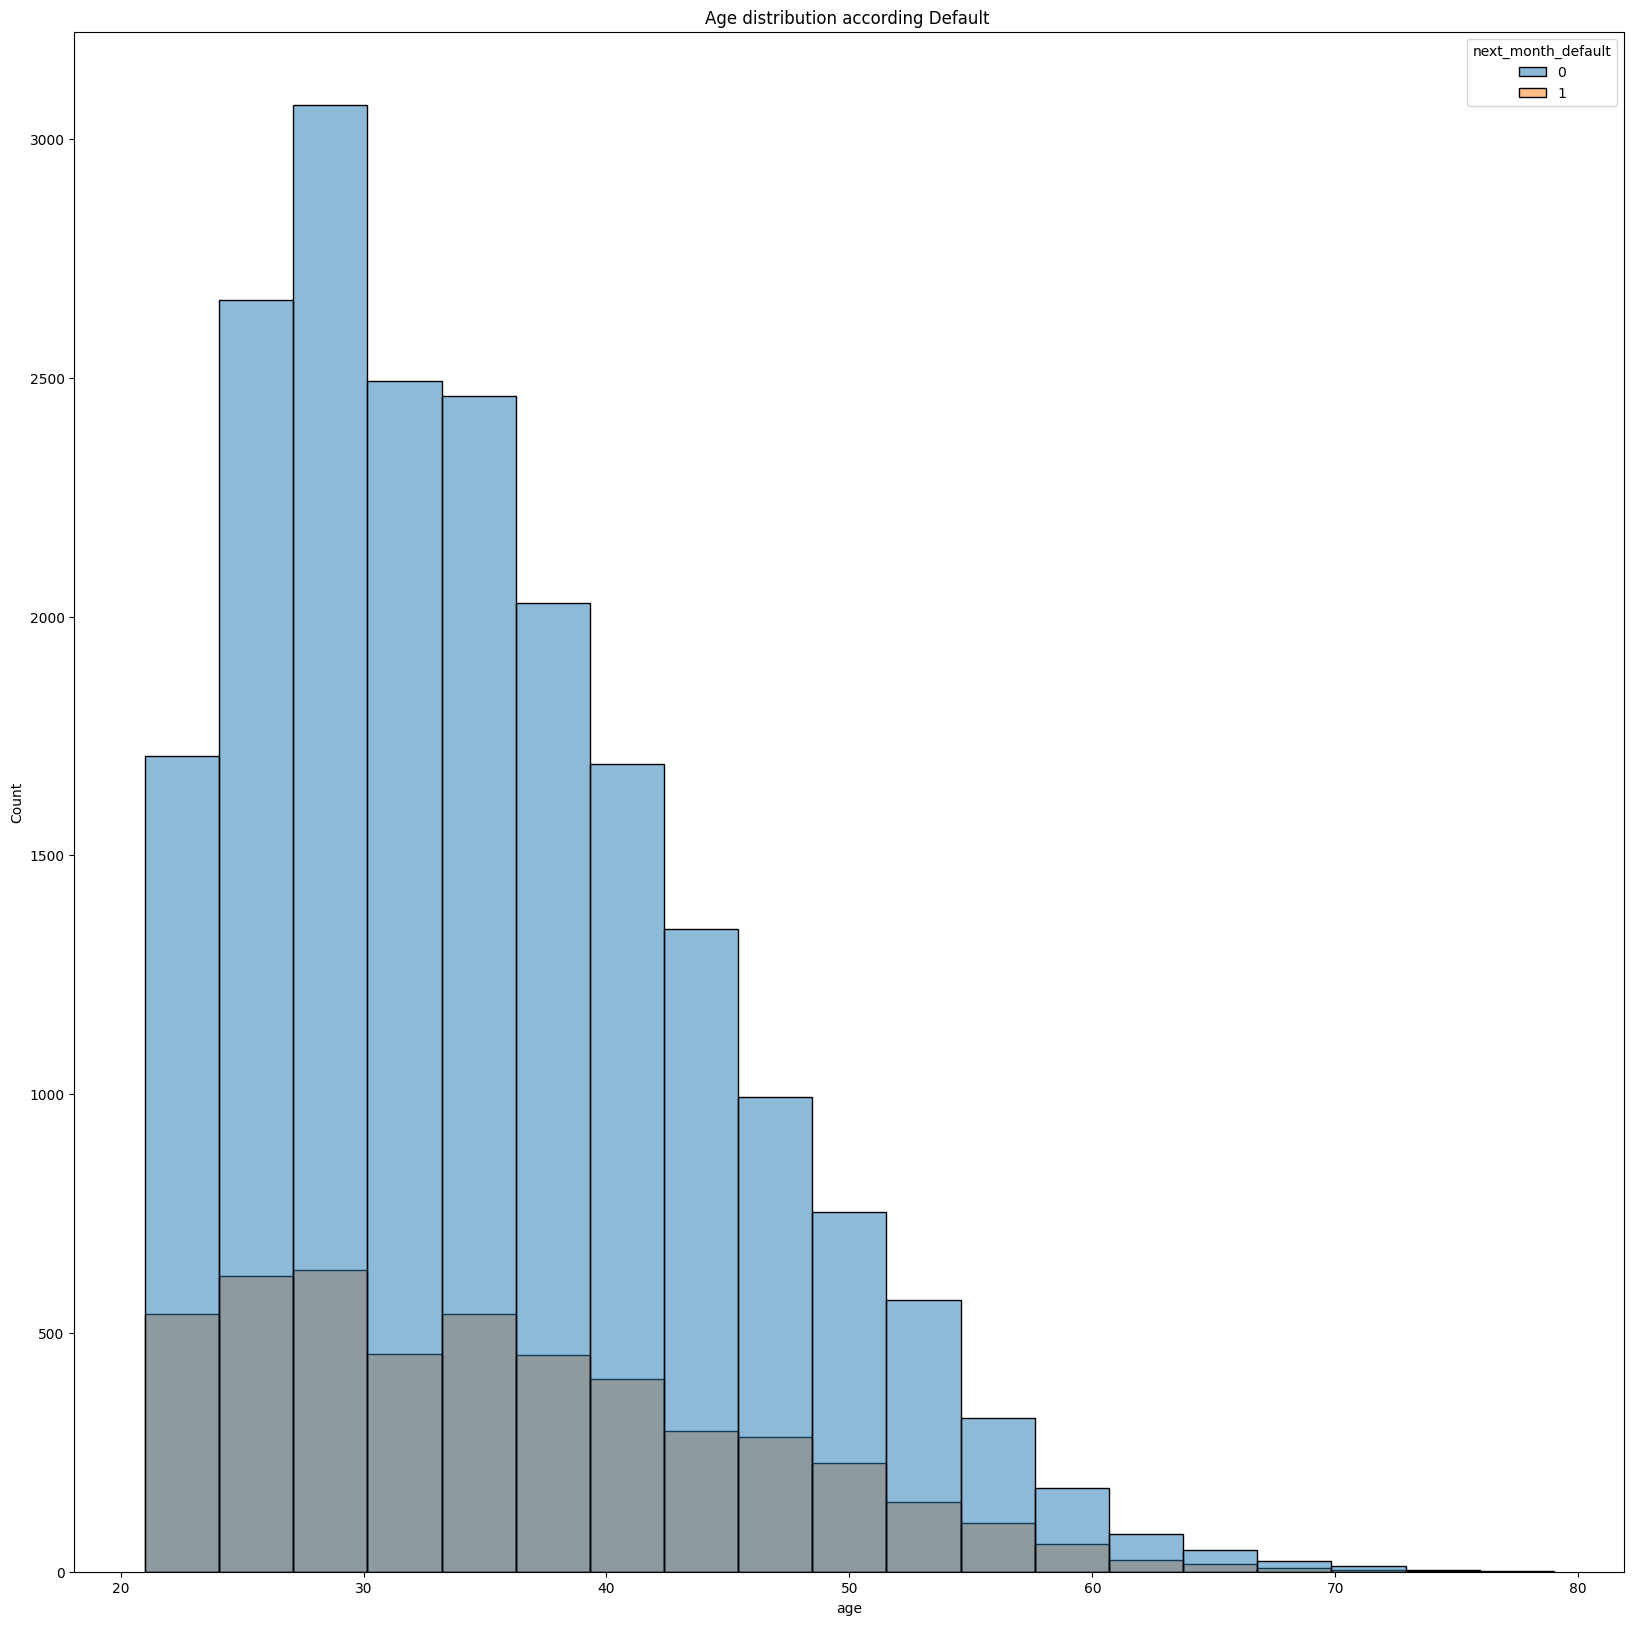

In [18]:
sns.histplot(data=df, x="age",binwidth=3)
plt.title("Age distribution")
plt.show()

sns.histplot(data=df, x="age", hue="next_month_default", binwidth=3)
plt.title("Age distribution according Default ")
plt.show()

LIMIT_BAL Variable:

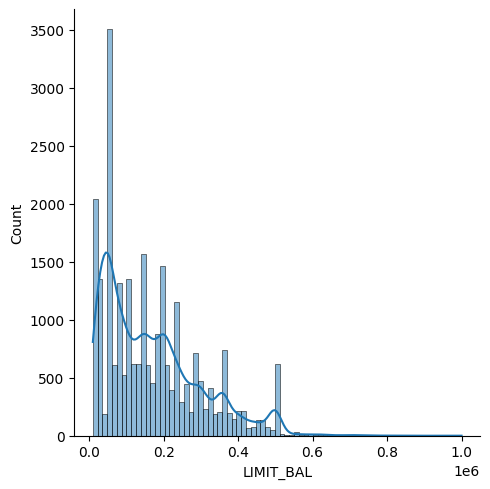

In [19]:
sns.displot(df.LIMIT_BAL, kde=True)

Amount of bill statement and Amount of previous payment

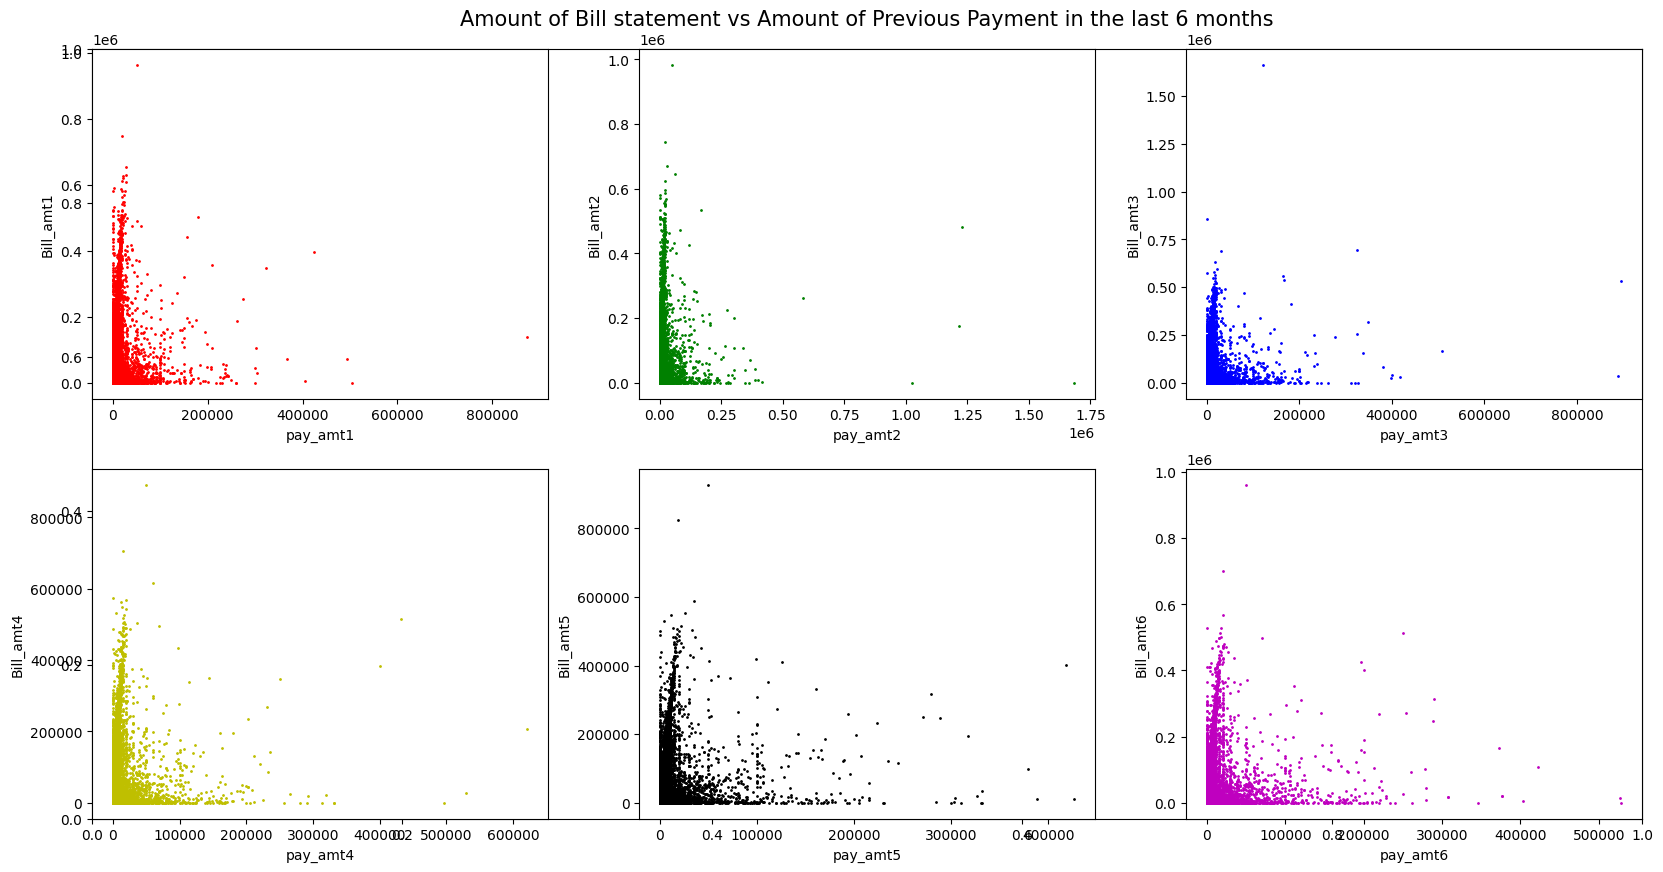

In [20]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=df.pay_amt1, y=df.Bill_amt1, c='r', s=1)
plt.xlabel('pay_amt1')
plt.ylabel('Bill_amt1')

plt.subplot(232)
plt.scatter(x=df.pay_amt2, y=df.Bill_amt2, c='g', s=1)
plt.xlabel('pay_amt2')
plt.ylabel('Bill_amt2')
plt.title('Amount of Bill statement vs Amount of Previous Payment in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=df.pay_amt3, y=df.Bill_amt3, c='b', s=1)
plt.xlabel('pay_amt3')
plt.ylabel('Bill_amt3')

plt.subplot(234)
plt.scatter(x=df.pay_amt4, y=df.Bill_amt4, c='y', s=1)
plt.xlabel('pay_amt4')
plt.ylabel('Bill_amt4')

plt.subplot(235)
plt.scatter(x=df.pay_amt5, y=df.Bill_amt5, c='black', s=1)
plt.xlabel('pay_amt5')
plt.ylabel('Bill_amt5')

plt.subplot(236)
plt.scatter(x=df.pay_amt6, y=df.Bill_amt6, c='m', s=1)
plt.xlabel('pay_amt6')
plt.ylabel('Bill_amt6')


plt.show()

Correlation Analysis:

<Axes: >

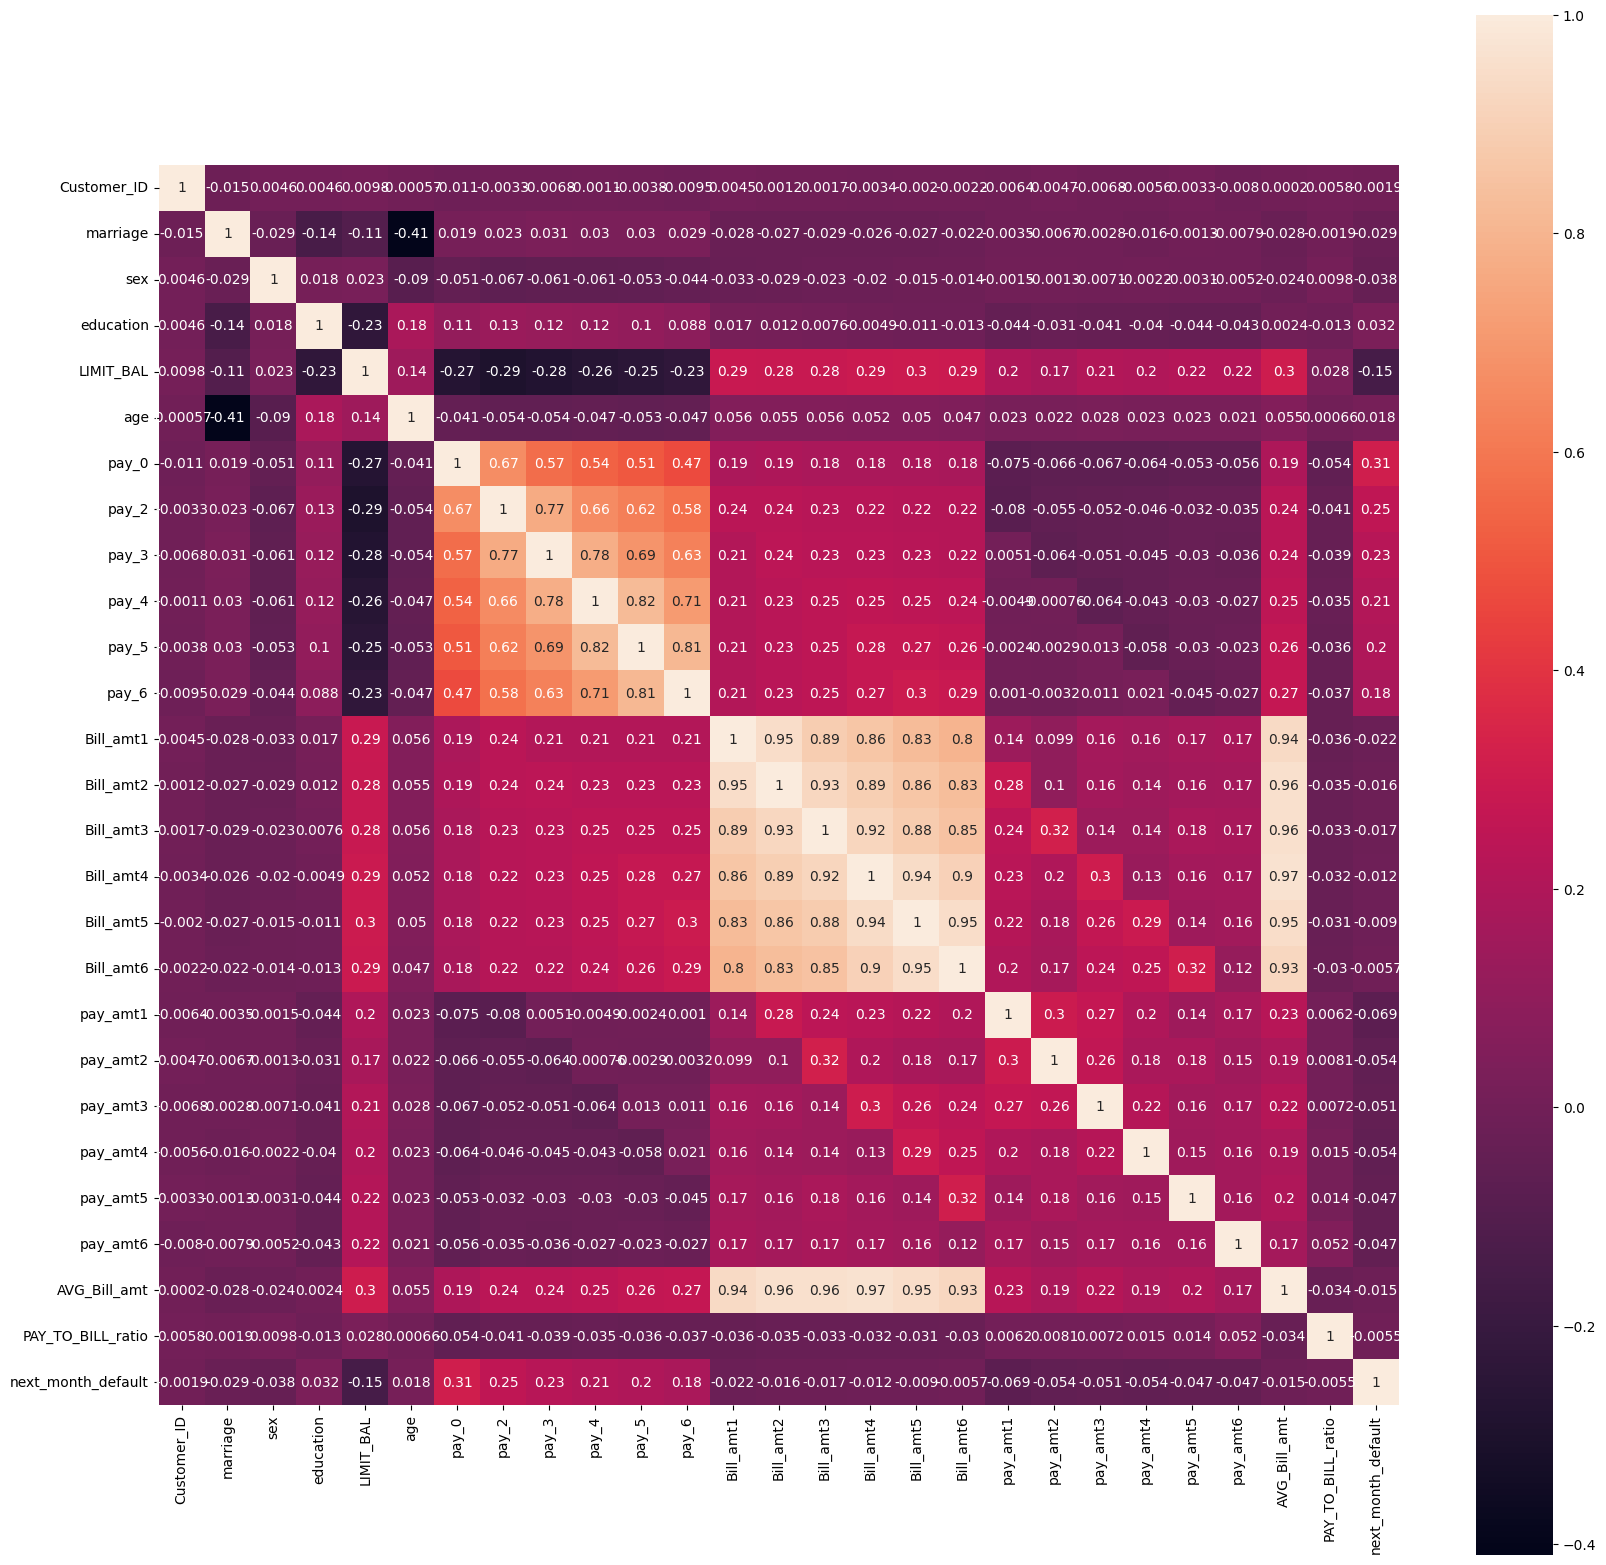

In [21]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True,square = True)

# **MODELLING:**

Create Target feature and independent feature

In [22]:
X = df.drop(['next_month_default'], axis=1)

y = df['next_month_default']
X.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,5017,2,0,2,60000,25.0,2,2,2,0,0,0,60323.86,60728.22,56472.74,28602.01,22191.53,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03
1,5018,2,1,1,290000,24.0,0,0,-2,-2,-1,0,11157.67,0.00,0.88,0.65,2700.96,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27
2,5019,1,0,2,180000,63.0,0,0,0,0,0,0,47930.96,48921.91,50034.26,50748.90,51902.56,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04
3,5020,1,1,2,210000,43.0,0,0,0,0,0,0,91152.44,92916.01,90652.30,85295.56,80416.75,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,-2,-2,19666.40,999.04,3186.48,44932.48,2099.77,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72


In [23]:
#feature engineering
scaler= StandardScaler()
X= scaler.fit_transform(X)

In [24]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

**Balancing the data**:

SMOTE (Synthetic Minority Over-sampling Technique) #most popular

Creates synthetic samples by interpolating between existing minority samples.

. Better than random duplication

. Reduces overfitting risk

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)


In [26]:
y_smote.value_counts()

,count
next_month_default,
1,16345
0,16345


a) Logistic Regression

In [39]:
logit= LogisticRegression()
logit.fit(X_smote, y_smote)

pred_logit= logit.predict(X_test)



print("Logit model's accuracy:", accuracy_score(y_test, pred_logit))

print(classification_report(y_test, pred_logit))

f2 = fbeta_score(y_test, pred_logit, beta=2)
print("F2 score:", f2)

Logit model's accuracy: 0.6796039603960397
              precision    recall  f1-score   support

           0       0.90      0.68      0.78      4095
           1       0.33      0.66      0.44       955

    accuracy                           0.68      5050
   macro avg       0.61      0.67      0.61      5050
weighted avg       0.79      0.68      0.71      5050

F2 score: 0.5491731940818103


b) Decision Tree Classifier:

In [40]:
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7,
                                     max_features= 9, min_samples_leaf= 2,
                                     random_state=0)
Tree.fit(X_smote, y_smote)
pred_tree = Tree.predict(X_test)
print('Decision Tree Accuracy :', accuracy_score(y_test,pred_tree))

print(classification_report(y_test, pred_tree))

f2 = fbeta_score(y_test, pred_tree, beta=2)
print("F2 score:", f2)


Decision Tree Accuracy : 0.8005940594059406
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4095
           1       0.48      0.52      0.50       955

    accuracy                           0.80      5050
   macro avg       0.68      0.69      0.69      5050
weighted avg       0.81      0.80      0.80      5050

F2 score: 0.5106863953966296


c) Random Forest:

In [41]:
rf= RandomForestClassifier()

rf.fit(X_smote,y_smote)

pred_rf= rf.predict(X_test)

print("Random Forest Accuracy is:", accuracy_score(y_test, pred_rf))

print(classification_report(y_test,pred_rf ))

f2 = fbeta_score(y_test, pred_rf, beta=2)
print("F2 score:", f2)


Random Forest Accuracy is: 0.8219801980198019
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4095
           1       0.54      0.44      0.48       955

    accuracy                           0.82      5050
   macro avg       0.71      0.68      0.69      5050
weighted avg       0.81      0.82      0.82      5050

F2 score: 0.4570125922709509


d) XGBoost:

In [42]:
xgboost= xgb.XGBClassifier()


xgboost.fit(X_smote,y_smote)

xgboost_pred= xgboost.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgboost_pred))
print(classification_report(y_test,xgboost_pred ))

f2 = fbeta_score(y_test, xgboost_pred, beta=2)
print("F2 score:", f2)

XGBoost Accuracy: 0.8297029702970297
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4095
           1       0.57      0.40      0.47       955

    accuracy                           0.83      5050
   macro avg       0.72      0.66      0.68      5050
weighted avg       0.81      0.83      0.82      5050

F2 score: 0.4227080080303368


# **Optuna parameter turning:**

In [33]:
!pip install optuna

1) XGBoost-Optuna

In [38]:
import xgboost as xgb
import optuna
from sklearn.metrics import make_scorer, fbeta_score

def objective_xgb(trial):
    max_depth = trial.suggest_int('max_depth', 2, 10)
    learn_rate = trial.suggest_loguniform('eta', 0.01, 0.3)
    n_estim = trial.suggest_int('n_estimators', 100, 500)

    clf = xgb.XGBClassifier(max_depth=max_depth, eta=learn_rate, n_estimators=n_estim, scale_pos_weight=len(y_smote[y_smote == 0]) / len(y_smote[y_smote == 1]))

    fbeta_scorer = make_scorer(fbeta_score, beta=2)
    score = cross_val_score(clf, X_smote, y_smote, scoring=fbeta_scorer, n_jobs=-1).mean()
    return score

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=15)

print("Best XGBoost Params :", study_xgb.best_params)
print("Best F2 score :", study_xgb.best_value)


[I 2025-06-16 07:52:13,760] A new study created in memory with name: no-name-bf9aeb78-dba1-4b5d-8e18-6983fa6cfe78
[I 2025-06-16 07:52:34,111] Trial 0 finished with value: 0.8009103415265791 and parameters: {'max_depth': 6, 'eta': 0.025531508031875337, 'n_estimators': 448}. Best is trial 0 with value: 0.8009103415265791.
[I 2025-06-16 07:52:39,342] Trial 1 finished with value: 0.6847474830594733 and parameters: {'max_depth': 4, 'eta': 0.018005095766726997, 'n_estimators': 162}. Best is trial 0 with value: 0.8009103415265791.
[I 2025-06-16 07:52:49,898] Trial 2 finished with value: 0.7429031800994848 and parameters: {'max_depth': 8, 'eta': 0.013003234609462401, 'n_estimators': 110}. Best is trial 0 with value: 0.8009103415265791.
[I 2025-06-16 07:53:10,047] Trial 3 finished with value: 0.813355734479958 and parameters: {'max_depth': 7, 'eta': 0.19834168589799314, 'n_estimators': 383}. Best is trial 3 with value: 0.813355734479958.
[I 2025-06-16 07:53:39,100] Trial 4 finished with value: 

Best XGBoost Params : {'max_depth': 10, 'eta': 0.04178828041324946, 'n_estimators': 259}
Best F2 score : 0.8320693135644015


In [73]:
# Train final model using best parameters
best_params = study_xgb.best_params
final_model_xgb =xgb.XGBClassifier(**best_params)
final_model_xgb.fit(X_smote, y_smote)

# Predict and Evaluate
y_pred = final_model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on Test Set: {accuracy:.4f}")


Accuracy on Test Set: 0.8333


2) Decision Tree Classification - Optuna

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, fbeta_score
import optuna

def objective_dt(trial):
    max_depth = trial.suggest_int('max_depth', 2, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    clf = DecisionTreeClassifier(max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   class_weight='balanced')

    fbeta_scorer = make_scorer(fbeta_score, beta=2)
    score = cross_val_score(clf, X_smote, y_smote, scoring=fbeta_scorer, n_jobs=-1).mean()
    return score

study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective_dt, n_trials=10)

print("Best Decision Tree Params :", study_dt.best_params)
print("Best F2 score :", study_dt.best_value)


[I 2025-06-16 07:51:33,566] A new study created in memory with name: no-name-8882297f-c3ca-497d-9199-6247ac6695fd
[I 2025-06-16 07:51:41,294] Trial 0 finished with value: 0.6087006071854333 and parameters: {'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.6087006071854333.
[I 2025-06-16 07:51:44,899] Trial 1 finished with value: 0.607607031096182 and parameters: {'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.6087006071854333.
[I 2025-06-16 07:51:49,111] Trial 2 finished with value: 0.6208779696018345 and parameters: {'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 6}. Best is trial 2 with value: 0.6208779696018345.
[I 2025-06-16 07:51:50,508] Trial 3 finished with value: 0.6087006071854333 and parameters: {'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 2 with value: 0.6208779696018345.
[I 2025-06-16 07:51:53,202] Trial 4 finished with value: 0.698228

Best Decision Tree Params : {'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 9}
Best F2 score : 0.6983518012953368


3) LogisticRegression -Optuna

In [43]:
from sklearn.linear_model import LogisticRegression

def objective_lr(trial):
    C = trial.suggest_loguniform('C', 0.01, 10)
    clf = LogisticRegression(C=C, max_iter=10000, class_weight='balanced')
    fbeta_scorer = make_scorer(fbeta_score, beta=2)
    score = cross_val_score(clf, X_smote, y_smote, scoring=fbeta_scorer, n_jobs=-1).mean()
    return score

study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=10)

print("Best C :", study_lr.best_params)
print("Best F2 score :", study_lr.best_value)


[I 2025-06-16 07:59:22,863] A new study created in memory with name: no-name-e94acde9-6d24-41d0-9121-bd38ca40ac81
[I 2025-06-16 07:59:23,560] Trial 0 finished with value: 0.6560354757621304 and parameters: {'C': 0.11696816803131661}. Best is trial 0 with value: 0.6560354757621304.
[I 2025-06-16 07:59:24,456] Trial 1 finished with value: 0.655956342233327 and parameters: {'C': 0.793294727232675}. Best is trial 0 with value: 0.6560354757621304.
[I 2025-06-16 07:59:25,408] Trial 2 finished with value: 0.6559299600220773 and parameters: {'C': 7.638439989979085}. Best is trial 0 with value: 0.6560354757621304.
[I 2025-06-16 07:59:25,958] Trial 3 finished with value: 0.6560195635976822 and parameters: {'C': 0.045887557633966854}. Best is trial 0 with value: 0.6560354757621304.
[I 2025-06-16 07:59:26,555] Trial 4 finished with value: 0.6558219199653401 and parameters: {'C': 0.05352293655750964}. Best is trial 0 with value: 0.6560354757621304.
[I 2025-06-16 07:59:27,176] Trial 5 finished with 

Best C : {'C': 0.11696816803131661}
Best F2 score : 0.6560354757621304


4) RandomForestClassifier - Optuna

In [44]:
from sklearn.ensemble import RandomForestClassifier

def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 2, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    clf = RandomForestClassifier(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   class_weight='balanced',
                                   n_jobs=-1)

    fbeta_scorer = make_scorer(fbeta_score, beta=2)
    score = cross_val_score(clf, X_smote, y_smote, scoring=fbeta_scorer, n_jobs=-1).mean()
    return score

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=10)

print("Best RandomForest Params :", study_rf.best_params)
print("Best F2 score :", study_rf.best_value)


[I 2025-06-16 07:59:32,767] A new study created in memory with name: no-name-6fa0ff49-ca90-4e93-ae24-23ab6f3a7859
[I 2025-06-16 08:00:04,882] Trial 0 finished with value: 0.6117721431054488 and parameters: {'n_estimators': 217, 'max_depth': 3, 'min_samples_split': 7}. Best is trial 0 with value: 0.6117721431054488.
[I 2025-06-16 08:02:30,812] Trial 1 finished with value: 0.7009518992959674 and parameters: {'n_estimators': 440, 'max_depth': 8, 'min_samples_split': 7}. Best is trial 1 with value: 0.7009518992959674.
[I 2025-06-16 08:03:01,348] Trial 2 finished with value: 0.6127190696068207 and parameters: {'n_estimators': 212, 'max_depth': 3, 'min_samples_split': 2}. Best is trial 1 with value: 0.7009518992959674.
[I 2025-06-16 08:04:19,679] Trial 3 finished with value: 0.6259657177341111 and parameters: {'n_estimators': 345, 'max_depth': 5, 'min_samples_split': 6}. Best is trial 1 with value: 0.7009518992959674.
[I 2025-06-16 08:05:23,799] Trial 4 finished with value: 0.630544142754952

Best RandomForest Params : {'n_estimators': 152, 'max_depth': 9, 'min_samples_split': 5}
Best F2 score : 0.7134913124399579


# **Compare Model Performance:**

In [49]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
     "XGBoost": xgb.XGBClassifier()
}

Comparison of baseline and Optuna-tuned models:
                     F2 (baseline)  Accuracy       AUC  F2 (optuna)
Model                                                              
Logistic Regression       0.549173  0.679604  0.672369     0.656035
Decision Tree             0.425574  0.729505  0.624051     0.698352
RandomForest              0.459870  0.822376  0.677301     0.713491
XGBoost                   0.422708  0.829703  0.663753     0.832069


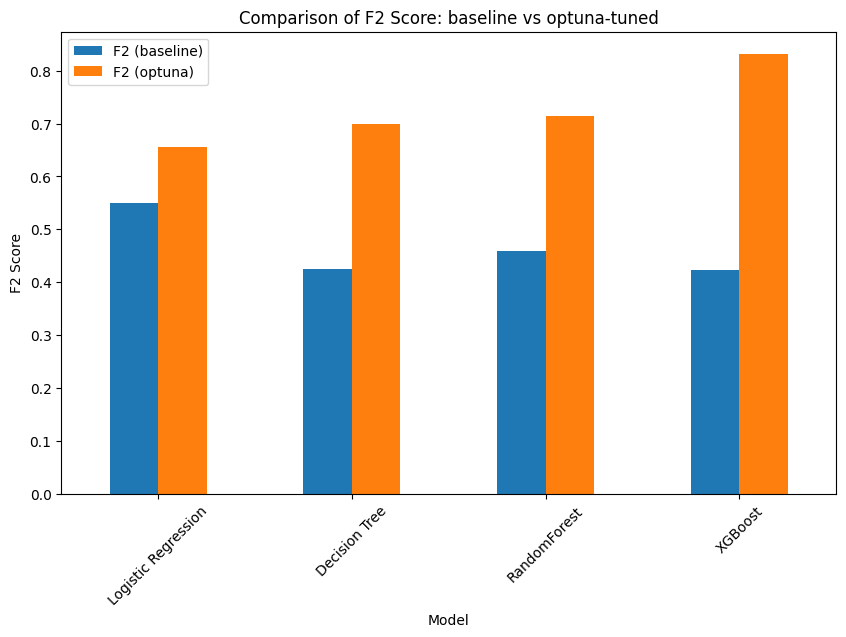

Comparison CSV has been successfully saved.


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import fbeta_score, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Define models first
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

# 1️) Train first and then evaluate baseline
baseline = []

for name, model in models.items():
    model.fit(X_smote, y_smote)  # Train on SMOTE-adjusted data
    y_pred = model.predict(X_test)

    f2 = fbeta_score(y_test, y_pred, beta=2)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    baseline.append({"Model": name, "F2 (baseline)": f2, "Accuracy": acc, "AUC": auc})

baseline_df = pd.DataFrame(baseline).set_index("Model")

# 2️) Prepare Optuna comparison
# (This assumes you have previously run optuna and got these best F2 scores)

optuna_f2 = {
    "Logistic Regression": study_lr.best_value,
    "Decision Tree": study_dt.best_value,
    "RandomForest": study_rf.best_value,
    "XGBoost": study_xgb.best_value
}

optuna_df = pd.DataFrame.from_dict(optuna_f2, orient='index', columns=['F2 (optuna)'])

# 3️) Combine
comparison = baseline_df.copy()
comparison = comparison.join(optuna_df)

print("Comparison of baseline and Optuna-tuned models:")
print(comparison)

# 4️) Plotting F2 scores side by side
comparison[["F2 (baseline)", "F2 (optuna)"]].plot(kind='bar', figsize=(10,6))
plt.title('Comparison of F2 Score: baseline vs optuna-tuned')
plt.ylabel('F2 Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 5️5) Save to CSV
comparison.to_csv("model_comparison_report.csv")
print("Comparison CSV has been successfully saved.")


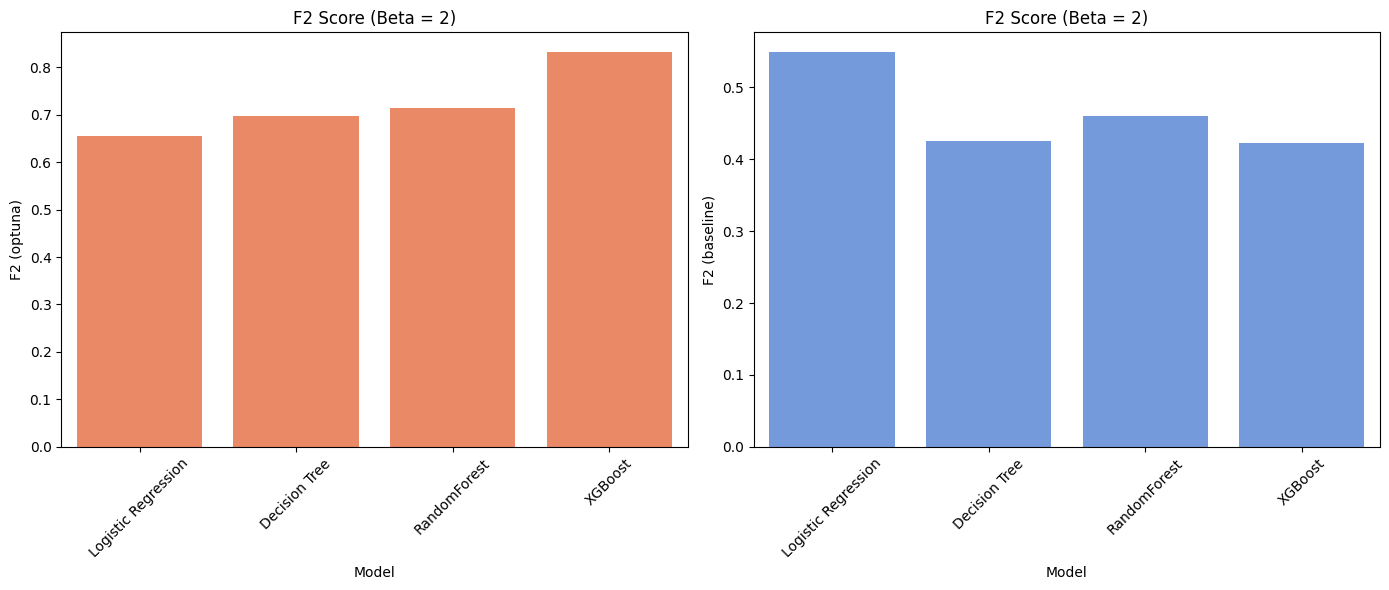

In [54]:
optuna_df = optuna_df.reset_index()
optuna_df = optuna_df.rename(columns={"index": "Model"})

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=optuna_df, x='Model', y='F2 (optuna)', color='#ff7f50', ax=axs[0])
axs[0].set_title('F2 Score (Beta = 2)')
axs[0].set_xticklabels(optuna_df['Model'], rotation=45)

# Similarly for baseline:
baseline_df = baseline_df.reset_index()
baseline_df = baseline_df.rename(columns={"index": "Model"})

sns.barplot(data=baseline_df, x='Model', y='F2 (baseline)', color='#6495ed', ax=axs[1])
axs[1].set_title('F2 Score (Beta = 2)')
axs[1].set_xticklabels(baseline_df['Model'], rotation=45)

plt.tight_layout()
plt.show()


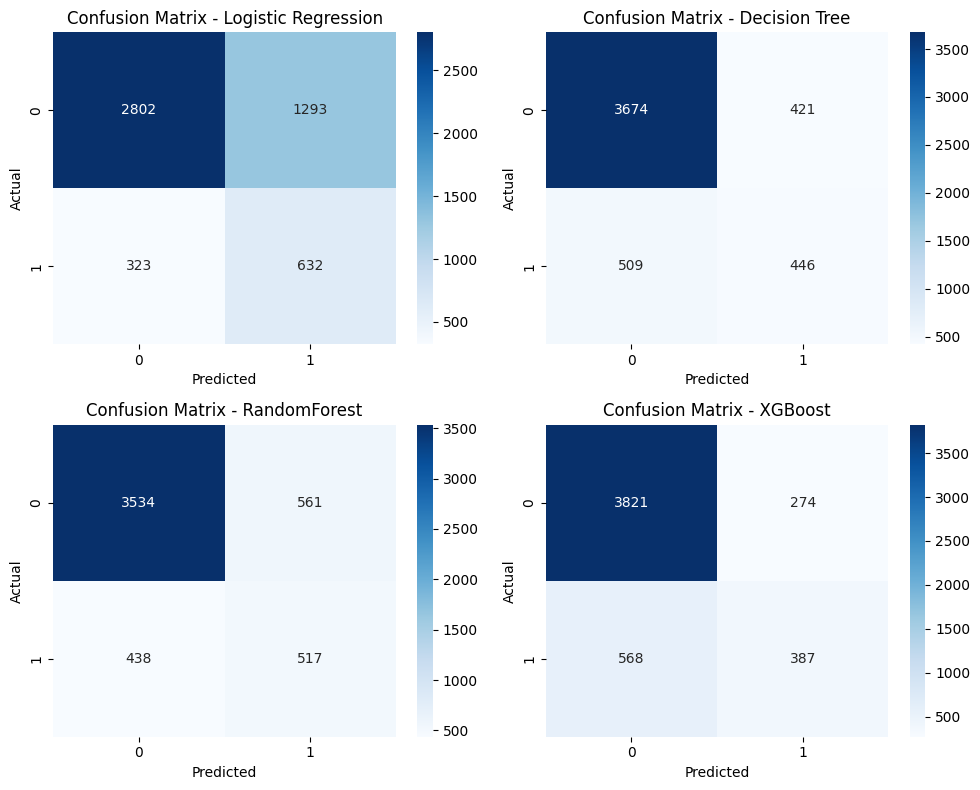

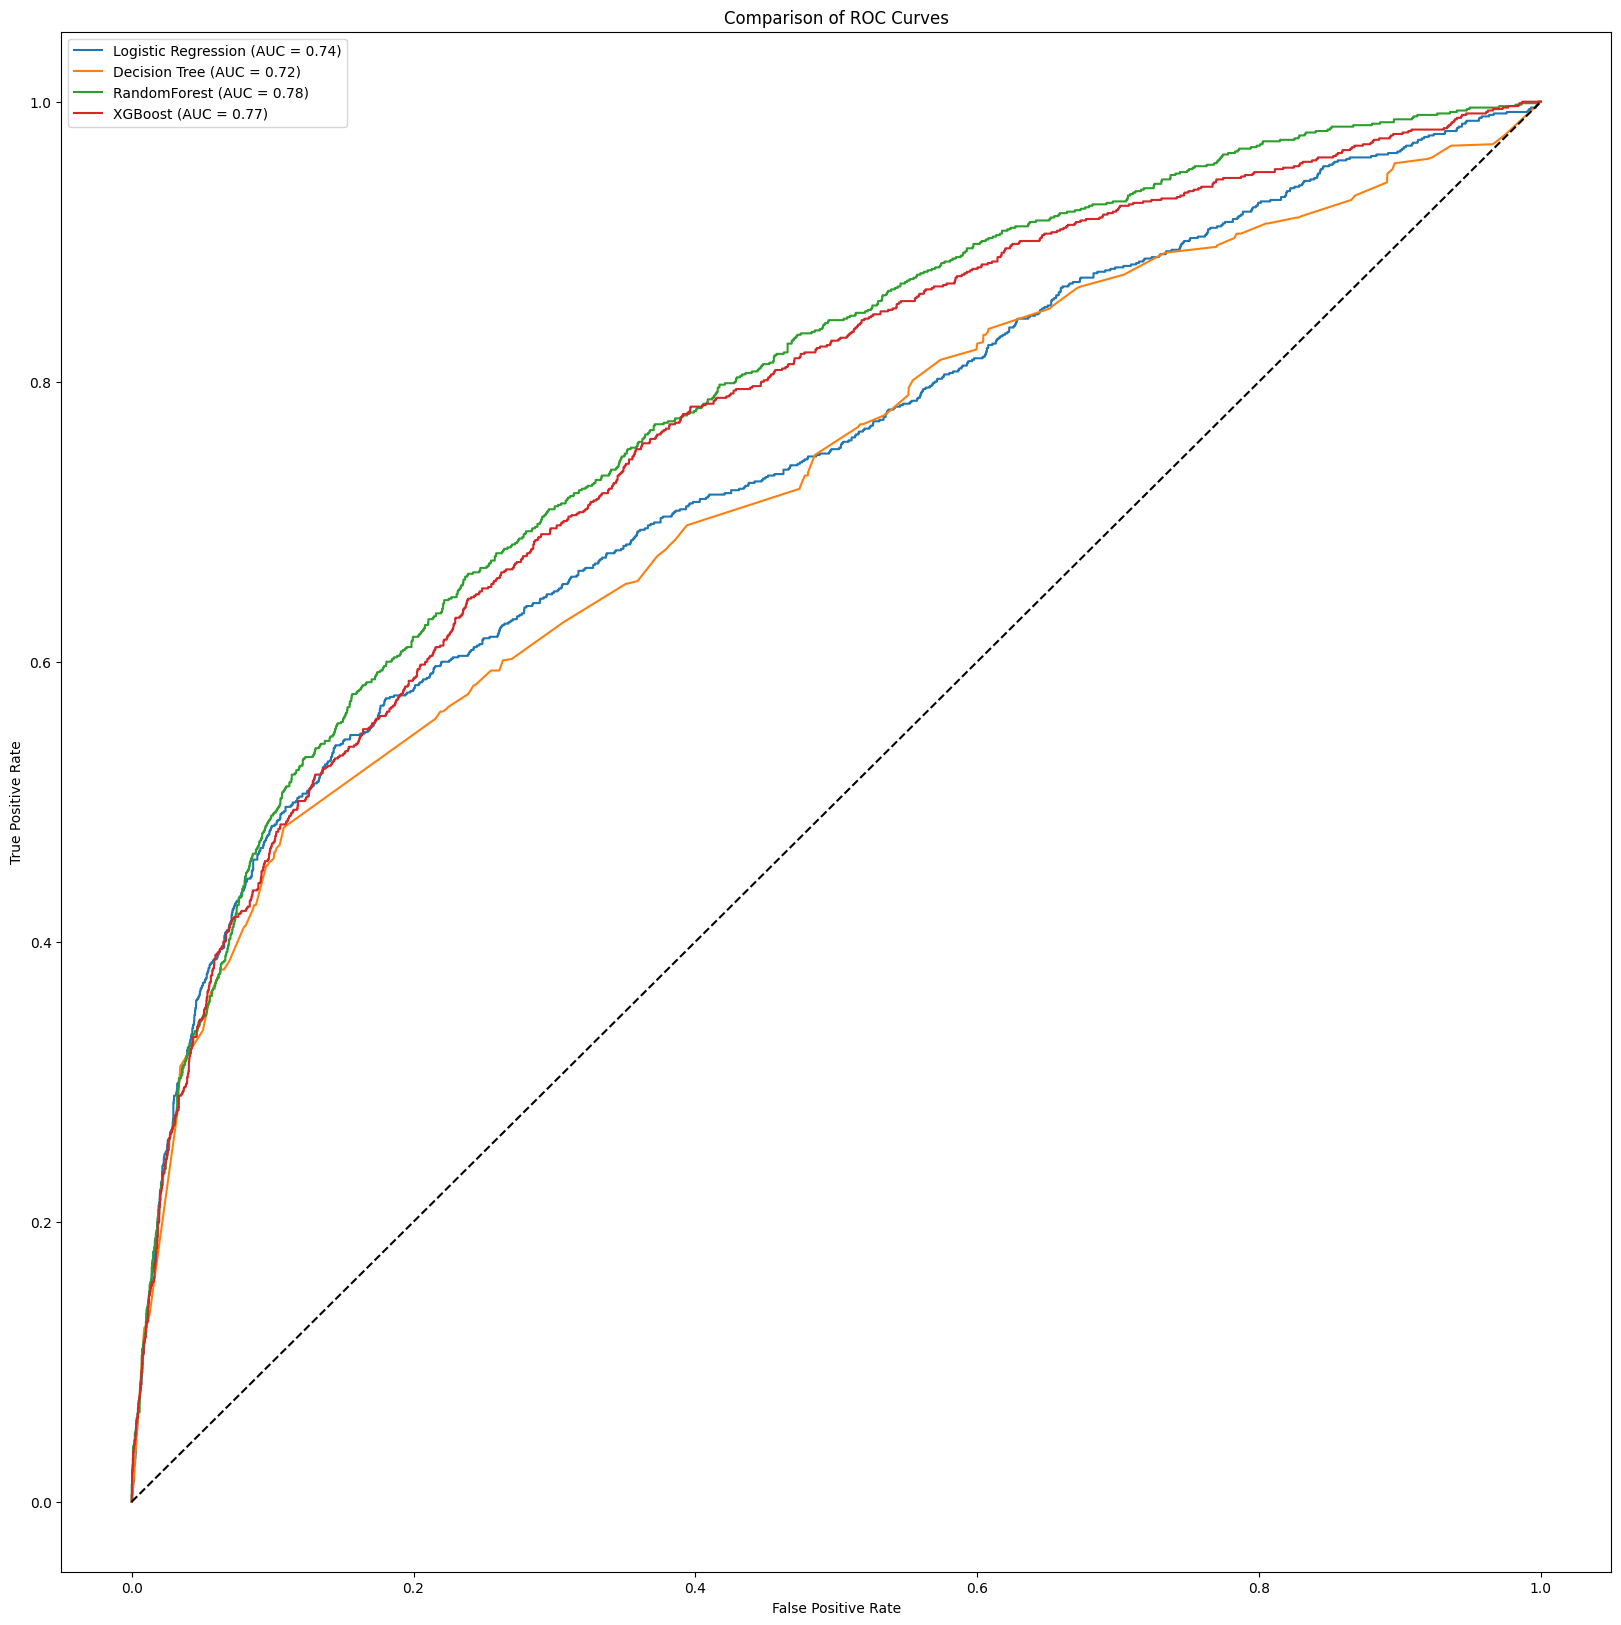

In [57]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, fbeta_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define and fit opt_models first
opt_models = {
    "Logistic Regression": LogisticRegression(**study_lr.best_params),
    "Decision Tree": DecisionTreeClassifier(**study_dt.best_params),
    "RandomForest": RandomForestClassifier(**study_rf.best_params),
    "XGBoost": xgb.XGBClassifier(**study_xgb.best_params),
}

for name, model in opt_models.items():
    model.fit(X_smote, y_smote)

# 1️) Plot confusion matrices first
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, (name, model) in enumerate(opt_models.items()):

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[i])
    axs[i].set_title(f'Confusion Matrix - {name}')
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')

fig.tight_layout()
plt.show()


# 2️) Plot ROC curve comparison
plt.figure()
for name, model in opt_models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Comparison of ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# **Valiation Dataset**

In [66]:
val=pd.read_csv('validate_dataset_final.csv')
val

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,0,0,0,0,0,0,28853.10,29144.77,27172.12,22066.47,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,2,0,1,350000,35,-1,-1,-1,0,0,0,4438.78,33718.18,14284.09,16425.68,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,3,2,1,1,310000,39,0,0,0,0,0,0,300500.53,265766.60,245457.90,249435.52,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,4,1,0,2,20000,47,0,0,0,2,2,2,10628.45,11650.67,14252.14,13678.06,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,5,2,1,2,500000,30,0,0,0,0,0,0,98617.77,73464.07,84740.39,72510.59,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,5012,1,0,2,240000,51,0,0,0,0,0,0,98588.36,100544.66,102650.93,104748.89,106832.47,109060.11,3591.87,3718.80,3797.93,3820.66,3949.01,3976.22,103737.83,0.04
5012,5013,1,1,3,60000,33,0,0,0,0,0,0,57560.27,57765.42,49351.45,28547.74,29062.53,28862.41,2100.23,3000.32,1499.86,1499.82,1099.82,1100.18,41858.83,0.04
5013,5014,1,0,1,290000,36,1,-2,-1,-1,0,0,0.00,0.00,567.27,16166.71,16725.60,17427.88,0.00,568.10,16165.93,1000.03,1000.05,1000.15,8481.17,0.39
5014,5015,1,1,2,120000,28,0,0,0,0,0,0,103675.25,96833.58,78920.51,74309.81,75710.06,77502.18,3283.48,2999.75,5000.26,3000.13,2999.95,4000.04,84492.00,0.04


In [67]:
val.isna().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0
pay_0,0
pay_2,0
pay_3,0
pay_4,0


In [68]:
val.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio'],
      dtype='object')

In [69]:
ca=['sex', 'education', 'marriage', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6']
for i in ca:
    print (i,val[i].unique())

sex [1 0]
education [2 1 3 4 5 0 6]
marriage [1 2 3 0]
pay_0 [ 0 -1 -2  1  2  4  3  5  8  6  7]
pay_2 [ 0 -1 -2  2  4  3  7  1  6  5]
pay_3 [ 0 -1 -2  2  3  6  4  7  5  1]
pay_4 [ 0  2 -2 -1  3  5  4  7  1]
pay_5 [ 0  2 -1 -2  3  4  7  5]
pay_6 [ 0  2 -1 -2  3  4  7  5  6]


In [70]:
val['education'].replace({0:4,5:4,6:4}, inplace=True)
val.education.value_counts()

,count
education,
2,2374
1,1796
3,760
4,86


In [71]:
val['marriage'].replace({0:3}, inplace=True)
val.marriage.value_counts()

,count
marriage,
2,2702
1,2262
3,52


In [78]:
val_customerid=pd.read_csv('validate_dataset_final.csv')

In [75]:
# Predict default class (0 or 1)
val_preds = final_model_xgb.predict(val)

In [76]:
val_preds.shape

(5016,)

In [79]:
val_customerid.shape

(5016, 26)

In [80]:
# Create DataFrame with only required columns
results_df = pd.DataFrame({
    'Customer_ID': val_customerid['Customer_ID'],
    'next_month_default': val_preds
})

In [81]:
# Save to CSV
results_df.to_csv('default_predictions.csv', index=False)

print("Predictions saved to 'default_predictions.csv'")

Predictions saved to 'default_predictions.csv'
